In [1]:
!pip install xgboost
!pip install catboost
!pip install lightgbm

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
train_df = pd.read_csv('/Users/B0297340/Downloads/Hackathon_may24/Train_dataset_(2)_(1).csv')


In [4]:
train_df.shape

(3493, 34)

In [5]:
train_df.describe(include='all').T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Registration Number,3493.0,NaN,NaN,NaN,61747.0,1008.486572,60001.0,60874.0,61747.0,62620.0,63493.0
Annual Turnover,3493.0,NaN,NaN,NaN,30725708.559977,21651246.901146,3500000.0,18000000.0,30000000.0,37000000.0,400000000.0
Cuisine,3493,20,"tibetan,greek",686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,3493,297,Bangalore,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Restaurant Location,3493,2,Near Party Hub,2658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opening Day of Restaurant,3493,1778,27/12/09,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Facebook Popularity Quotient,3394.0,NaN,NaN,NaN,77.938715,9.829169,43.0,72.0,79.0,85.745,97.76
Endorsed By,3493,3,Not Specific,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Instagram Popularity Quotient,3437.0,NaN,NaN,NaN,74.404684,10.940327,40.0,66.0,74.05,82.4,98.7
Fire Audit,3493.0,NaN,NaN,NaN,0.78872,0.408275,0.0,1.0,1.0,1.0,1.0


In [6]:
train_df.head(10)

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.30,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29/09/08,85.40,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.00,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.60,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6
5,60006,30000000,"tibetan,greek",Hyderabad,Near Party Hub,28/06/11,89.92,Not Specific,87.0,1,...,NaN,6.0,NaN,4.0,NaN,6.0,5,0,2,5
6,60007,30000000,"indian,irish",Banglore,Near Party Hub,28/01/12,86.08,Not Specific,67.5,1,...,7.0,4.0,NaN,3.0,NaN,10.0,6,2,0,4
7,60008,40000000,"indian,irish",Bangalore,Near Party Hub,23/05/11,92.00,Tier A Celebrity,91.0,1,...,9.0,NaN,NaN,NaN,4.0,6.0,9,5,4,9
8,60009,60000000,"chinese,salvadorian",Noida,Near Party Hub,12/09/10,90.00,Tier A Celebrity,NaN,0,...,10.0,7.0,3.0,NaN,NaN,6.0,8,3,2,6
9,60010,23000000,"algerian,belgian",Kolkata,Near Party Hub,08/06/12,NaN,Tier A Celebrity,NaN,1,...,8.0,3.0,3.0,NaN,NaN,4.0,8,3,5,7


In [7]:
train_df.dtypes

Registration Number                int64
Annual Turnover                    int64
Cuisine                           object
City                              object
Restaurant Location               object
Opening Day of Restaurant         object
Facebook Popularity Quotient     float64
Endorsed By                       object
Instagram Popularity Quotient    float64
Fire Audit                         int64
Liquor License Obtained            int64
Situated in a Multi Complex        int64
Dedicated Parking                  int64
Open Sitting Available             int64
Resturant Tier                   float64
Restaurant Type                   object
Restaurant Theme                  object
Restaurant Zomato Rating           int64
Restaurant City Tier               int64
Order Wait Time                    int64
Staff Responsivness                int64
Value for Money                    int64
Hygiene Rating                     int64
Food Rating                        int64
Overall Restaura

In [8]:
object_columns = train_df.select_dtypes(include=['object']).columns

# Print unique values for each object column
for col in object_columns:
    print(f"Unique values in column '{col}':")
    print(train_df[col].unique())
    print("\n")

Unique values in column 'Cuisine':
['indian,irish' 'tibetan,italian' 'turkish,nigerian' 'irish,belgian'
 'tibetan,greek' 'chinese,salvadorian' 'algerian,belgian' 'welsh,thai'
 'peruvian,cuban' 'japanese,thai' 'british,japanese' 'nigerian,cajun'
 'algerian,algerian' 'polish,jewish' 'cuban,british' 'algerian,korean'
 'swedish,greek' 'turkish,sapnish' 'british,belgian' 'hawaiian,latvian']


Unique values in column 'City':
['Bangalore' 'Indore' 'Chennai' 'Gurgaon' 'Manesar' 'Hyderabad' 'Banglore'
 'Noida' 'Kolkata' 'Pune' '-1' 'mohali' 'Jhansi' 'Delhi' 'Hyderabad '
 'Bangalore ' 'noida' 'delhi' 'Bhubaneswar' 'Navi Mumbai' 'Mumbai'
 'New Delhi' 'Mangalore' 'Rewari' 'Gaziabaad' 'Bhiwadi' 'Mysore' 'Rajkot'
 'Greater Noida' 'Jaipur' 'noida ' 'HYDERABAD' 'mysore' 'THANE'
 'Maharajganj' 'Thiruvananthapuram' 'Punchkula' 'Bhubaneshwar' 'Pune '
 'coimbatore' 'Dhanbad' 'Lucknow' 'Trivandrum' 'kolkata' 'mumbai'
 'Gandhi Nagar' 'Una' 'Daman and Diu' 'chennai' 'GURGOAN' 'vsakhapttnam'
 'pune' 'Nagpur' 

In [9]:
train_df.isnull().sum()

Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs 

In [10]:
def check_unique_values(df):

    null_value_cols = df.columns[train_df.isnull().any()].tolist()

# Print unique values for columns with null values
    for col in null_value_cols:
        unique_values = df[col].value_counts()
        print(f"'{col}' unique values : {unique_values}")
        print("\n")
    

    
check_unique_values(train_df)    


'Facebook Popularity Quotient' unique values : Facebook Popularity Quotient
82.00    62
75.00    61
76.00    59
78.00    59
73.00    58
         ..
75.52     1
81.38     1
60.50     1
87.68     1
69.10     1
Name: count, Length: 776, dtype: int64


'Instagram Popularity Quotient' unique values : Instagram Popularity Quotient
70.00    64
72.00    60
74.00    56
65.00    52
68.00    51
         ..
68.15     1
78.43     1
65.25     1
82.70     1
62.11     1
Name: count, Length: 742, dtype: int64


'Resturant Tier' unique values : Resturant Tier
2.0    3191
1.0     253
Name: count, dtype: int64


'Overall Restaurant Rating' unique values : Overall Restaurant Rating
9.0     1016
10.0     859
7.0      585
8.0      533
6.0      288
Name: count, dtype: int64


'Live Music Rating' unique values : Live Music Rating
4.0    1110
3.0     684
5.0     629
6.0     162
2.0      97
1.0      30
7.0      14
8.0       2
Name: count, dtype: int64


'Comedy Gigs Rating' unique values : Comedy Gigs Rating
3.0

In [11]:
train_df.duplicated().sum()

0

In [12]:
train_df=train_df.drop(columns='City')

In [13]:
if 'Opening Day of Restaurant' in train_df.columns:
    # Convert to datetime
    train_df['Opening Day of Restaurant'] = pd.to_datetime(train_df['Opening Day of Restaurant'], errors='coerce')

    # Extract the year and create a new column 'Opening Year'
    train_df['Opening Year'] = train_df['Opening Day of Restaurant'].dt.year

    # Extract day-month and create a new column 'Day-Month'
    train_df['Day-Month'] = train_df['Opening Day of Restaurant'].dt.strftime('%d-%m')
else:
    print("Column 'Opening Day of Restaurant' not found in DataFrame")



/var/folders/24/07fj948n5s15ll38ncxjpm400000gq/T/ipykernel_13283/2021225112.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Opening Day of Restaurant'] = pd.to_datetime(train_df['Opening Day of Restaurant'], errors='coerce')


In [14]:
emputed_df = train_df.drop(columns=['Opening Day of Restaurant'])

In [15]:
emputed_df.columns

Index(['Registration Number', 'Annual Turnover', 'Cuisine',
       'Restaurant Location', 'Facebook Popularity Quotient', 'Endorsed By',
       'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating',
       'Value Deals Rating', 'Live Sports Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy', 'Opening Year', 'Day-Month'],
      dtype='object')

In [16]:
emputed_df.describe(include='all').T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Registration Number,3493.0,NaN,NaN,NaN,61747.0,1008.486572,60001.0,60874.0,61747.0,62620.0,63493.0
Annual Turnover,3493.0,NaN,NaN,NaN,30725708.559977,21651246.901146,3500000.0,18000000.0,30000000.0,37000000.0,400000000.0
Cuisine,3493,20,"tibetan,greek",686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Restaurant Location,3493,2,Near Party Hub,2658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Facebook Popularity Quotient,3394.0,NaN,NaN,NaN,77.938715,9.829169,43.0,72.0,79.0,85.745,97.76
Endorsed By,3493,3,Not Specific,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Instagram Popularity Quotient,3437.0,NaN,NaN,NaN,74.404684,10.940327,40.0,66.0,74.05,82.4,98.7
Fire Audit,3493.0,NaN,NaN,NaN,0.78872,0.408275,0.0,1.0,1.0,1.0,1.0
Liquor License Obtained,3493.0,NaN,NaN,NaN,0.988262,0.107719,0.0,1.0,1.0,1.0,1.0
Situated in a Multi Complex,3493.0,NaN,NaN,NaN,0.808188,0.393783,0.0,1.0,1.0,1.0,1.0


,Registration Number,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,...,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy,Opening Year
0,60001,42000000,84.30,95.80,1,1,1,0,1,2.0,...,4.0,NaN,NaN,NaN,8.0,8,6,6,6,2009
1,60002,50000000,85.40,85.00,1,1,1,1,0,2.0,...,NaN,4.0,NaN,NaN,5.0,7,7,3,8,2008
2,60003,32500000,85.00,68.20,1,1,1,1,0,2.0,...,3.0,NaN,NaN,NaN,7.0,10,5,2,8,2011
3,60004,110000000,85.60,83.60,0,1,1,1,1,1.0,...,6.0,NaN,NaN,NaN,7.0,7,4,3,5,2008
4,60005,20000000,NaN,76.80,1,1,1,1,1,NaN,...,NaN,2.0,NaN,NaN,NaN,6,2,4,6,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,63489,40500000,69.10,62.11,1,1,0,1,1,2.0,...,5.0,NaN,NaN,NaN,7.0,7,6,6,8,2009
3489,63490,32500000,91.00,96.30,1,1,0,1,0,2.0,...,4.0,NaN,NaN,NaN,4.0,9,4,0,5,2012
3490,63491,42500000,80.83,86.80,1,1,1,1,0,2.0,...,NaN,NaN,NaN,3.0,6.0,8,3,3,7,2009
3491,63492,53000000,79.40,86.00,1,1,1,1,1,2.0,...,3.0,2.0,NaN,NaN,7.0,6,3,3,6,2008


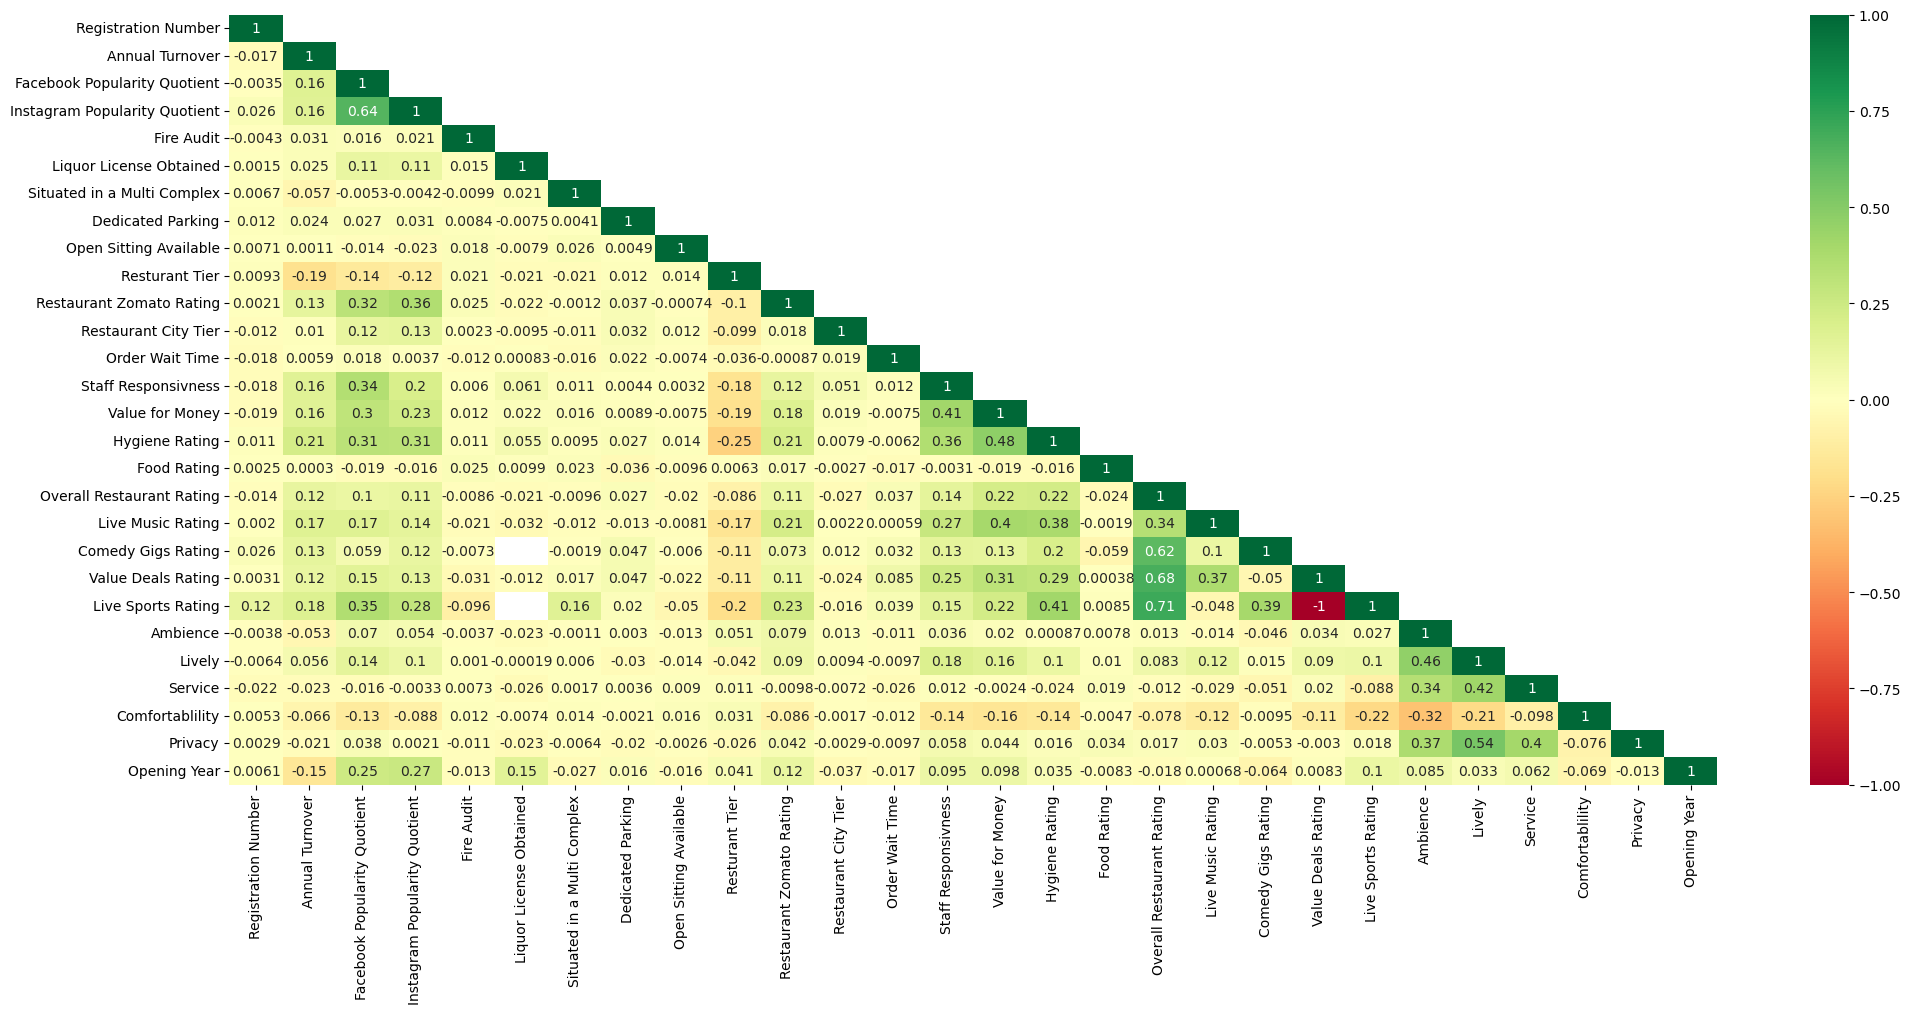

In [17]:
def segregate_numerical_columns(df):
    # Select columns with numeric data types
    numerical_columns = df.select_dtypes(include=['int', 'float']).columns
    df_num = df[numerical_columns]
    return df_num

df_num = segregate_numerical_columns(emputed_df)

plt.figure(figsize=(24,10))
sns.heatmap(df_num.corr(),annot=True,mask=np.triu(df_num.corr(),+1),cmap='RdYlGn');



segregate_numerical_columns(emputed_df)

In [18]:
def filter_correlation(df):
    # Select only continuous (numeric) variables
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Initialize lists to store column pairs for moderate and strong correlations
    moderate_correlations = []
    strong_correlations = []
    
    # Iterate over the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            # Check for moderate correlation
            if 0.4 <= abs(corr_value) <= 0.7:
                moderate_correlations.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))
            # Check for strong correlation
            elif abs(corr_value) > 0.7:
                strong_correlations.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))
                
    return moderate_correlations, strong_correlations


moderate_correlations, strong_correlations = filter_correlation(emputed_df)

print("Moderate Correlations:")
for corr in moderate_correlations:
    print(f"{corr[0]} - {corr[1]}: {corr[2]}")

print("\nStrong Correlations:")
for corr in strong_correlations:
    print(f"{corr[0]} - {corr[1]}: {corr[2]}")

Moderate Correlations:
Facebook Popularity Quotient - Instagram Popularity Quotient: 0.6434557298592718
Staff Responsivness - Value for Money: 0.41154873136587233
Value for Money - Hygiene Rating: 0.47534952694640853
Hygiene Rating - Live Sports Rating: 0.41394206698321573
Overall Restaurant Rating - Comedy Gigs Rating: 0.6171881124205855
Overall Restaurant Rating - Value Deals Rating: 0.677164063785793
Ambience - Lively: 0.4636865962324128
Lively - Service: 0.4217219080286841
Lively - Privacy: 0.5425820021733336
Service - Privacy: 0.40200480192598415

Strong Correlations:
Overall Restaurant Rating - Live Sports Rating: 0.7081194739377987
Value Deals Rating - Live Sports Rating: -1.0


In [19]:
emputed_df = emputed_df.drop(columns='Live Sports Rating', axis=1)

In [20]:
null_percentage = emputed_df.isnull().mean() * 100
print(null_percentage.round(2))

Registration Number               0.00
Annual Turnover                   0.00
Cuisine                           0.00
Restaurant Location               0.00
Facebook Popularity Quotient      2.83
Endorsed By                       0.00
Instagram Popularity Quotient     1.60
Fire Audit                        0.00
Liquor License Obtained           0.00
Situated in a Multi Complex       0.00
Dedicated Parking                 0.00
Open Sitting Available            0.00
Resturant Tier                    1.40
Restaurant Type                   0.00
Restaurant Theme                  0.00
Restaurant Zomato Rating          0.00
Restaurant City Tier              0.00
Order Wait Time                   0.00
Staff Responsivness               0.00
Value for Money                   0.00
Hygiene Rating                    0.00
Food Rating                       0.00
Overall Restaurant Rating         6.07
Live Music Rating                21.90
Comedy Gigs Rating               71.09
Value Deals Rating       

In [21]:
emputed_df=emputed_df.drop(columns='Comedy Gigs Rating')
emputed_df=emputed_df.drop(columns='Value Deals Rating')

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

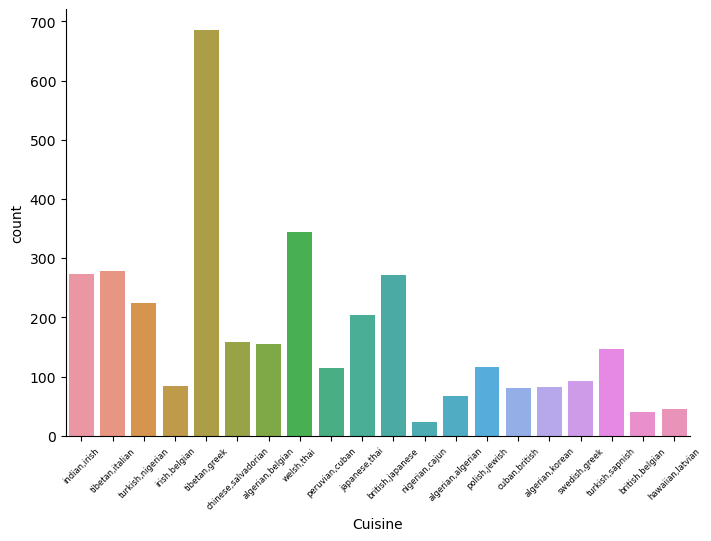

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

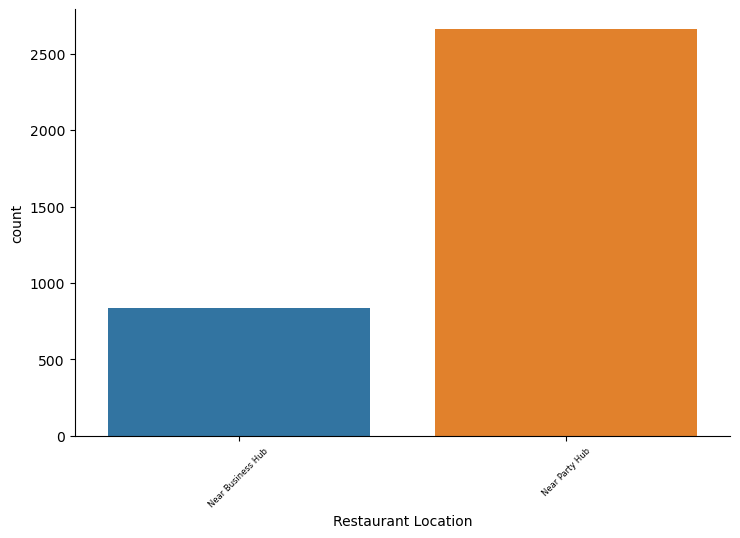

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

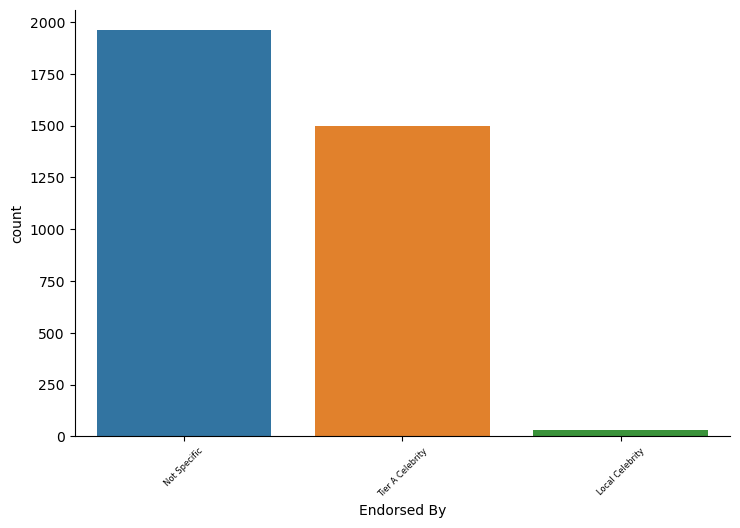

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

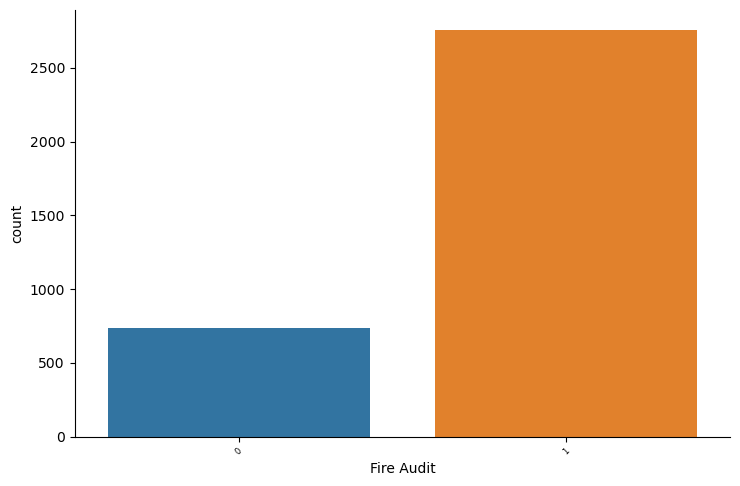

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

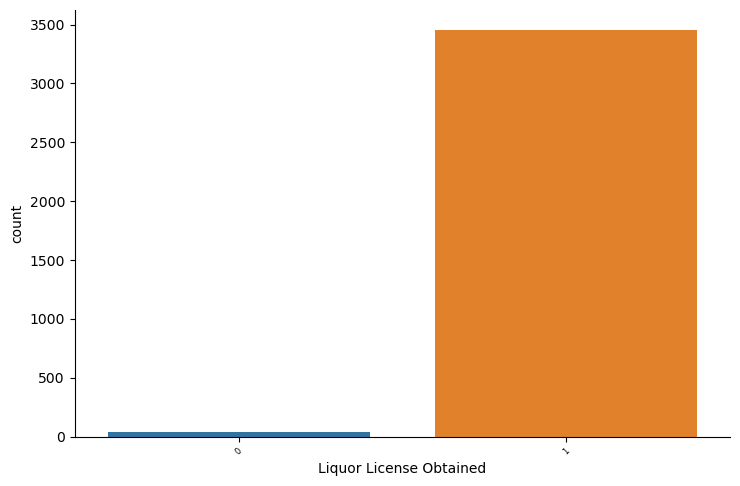

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

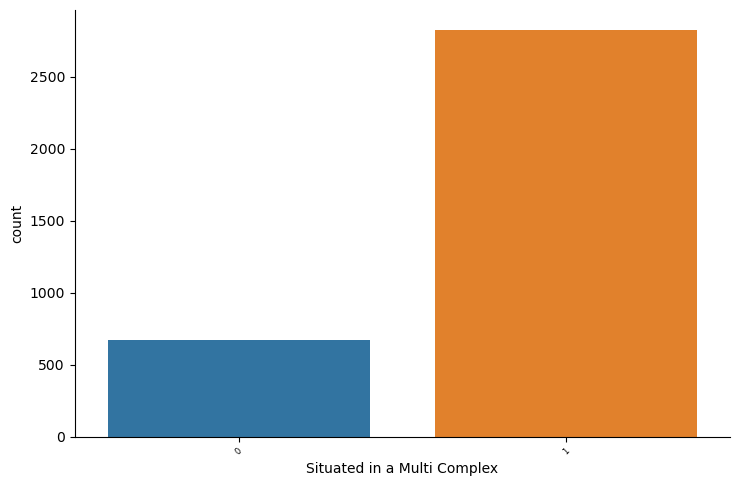

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

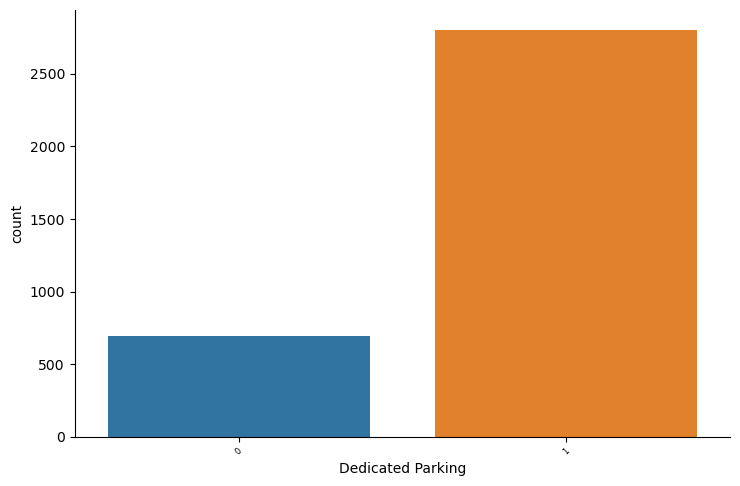

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

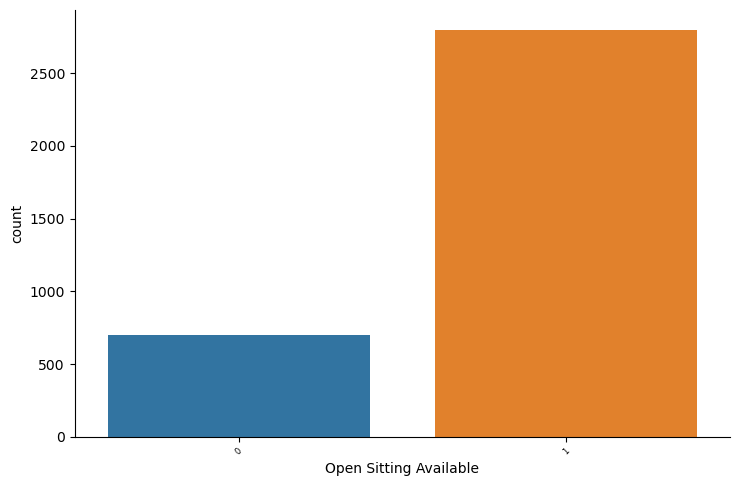

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

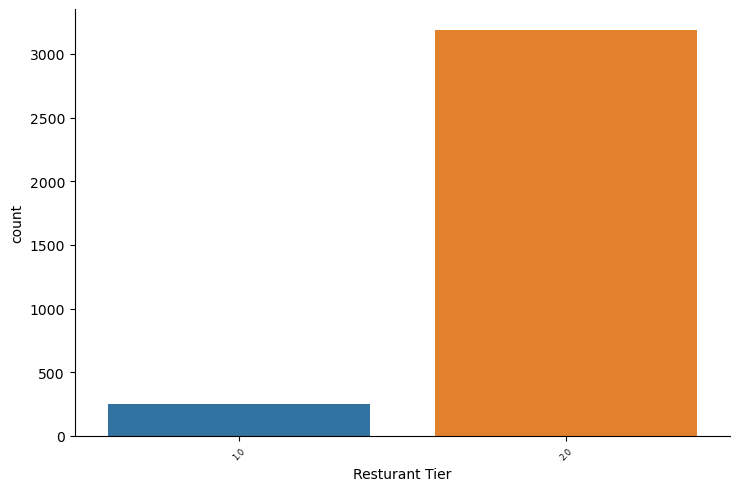

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

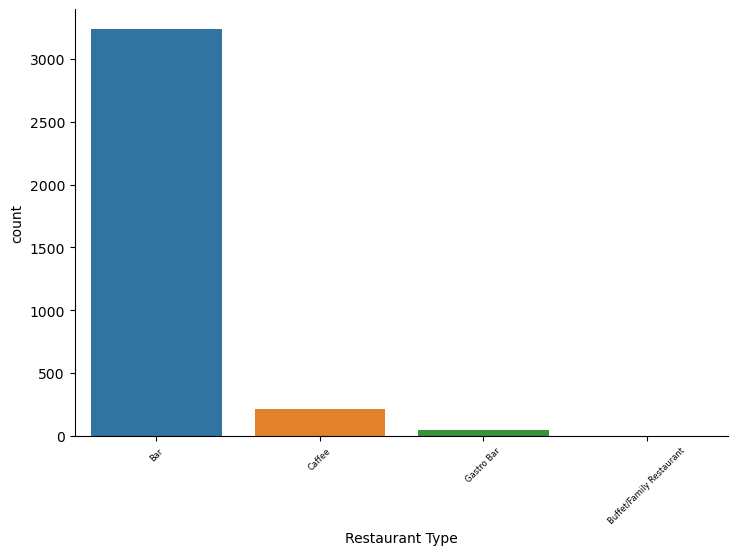

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

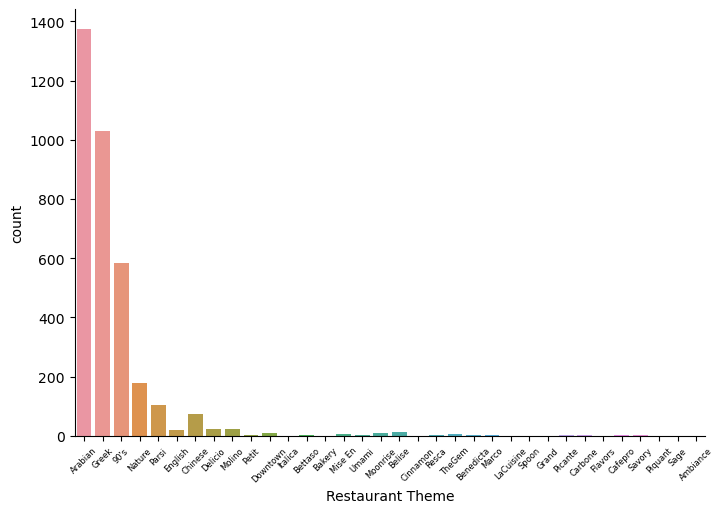

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

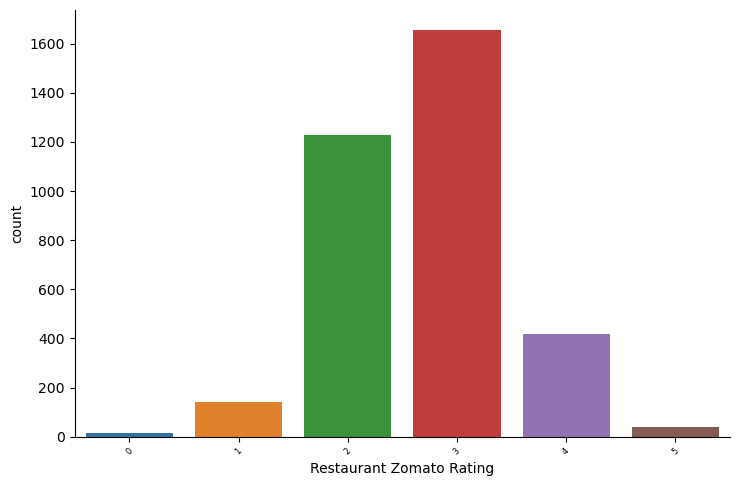

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

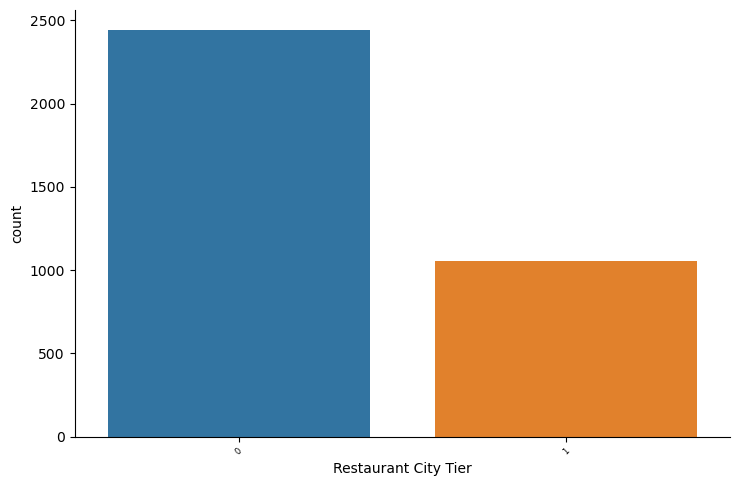

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

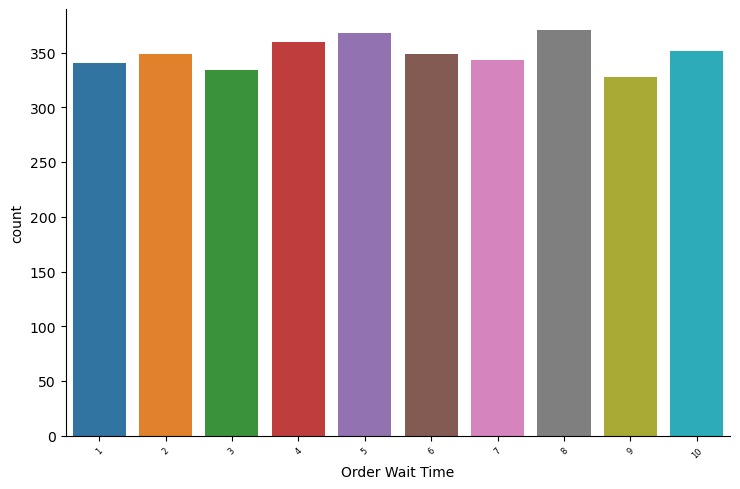

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

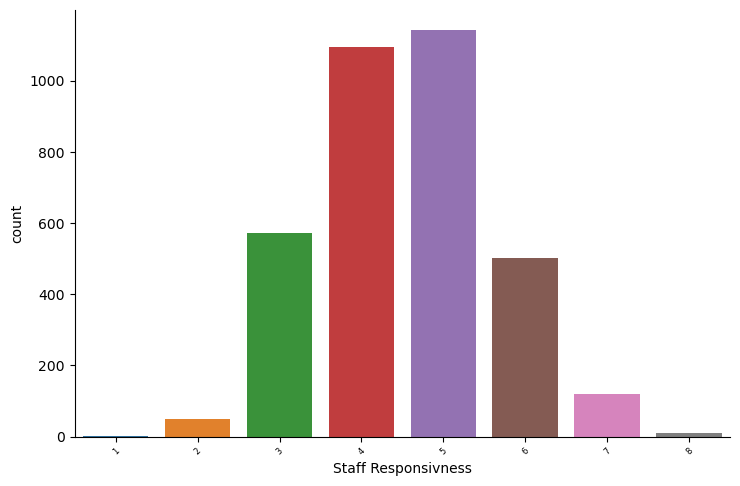

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

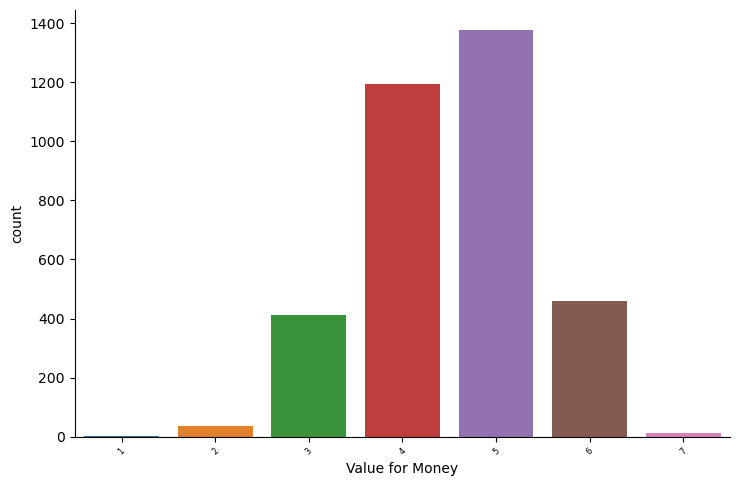

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

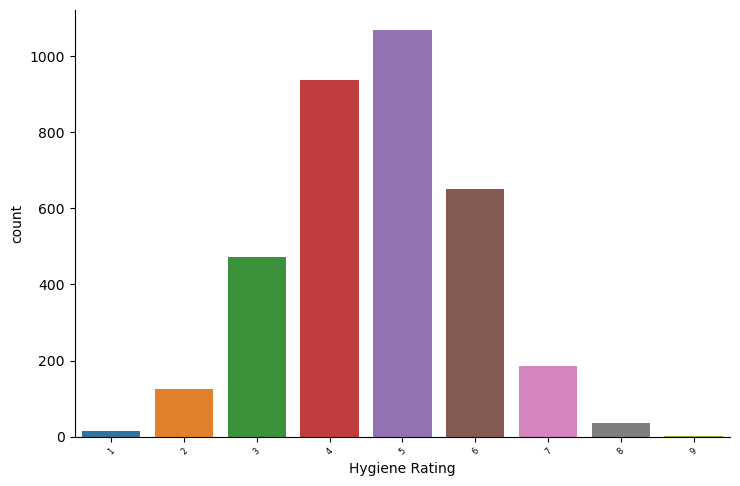

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

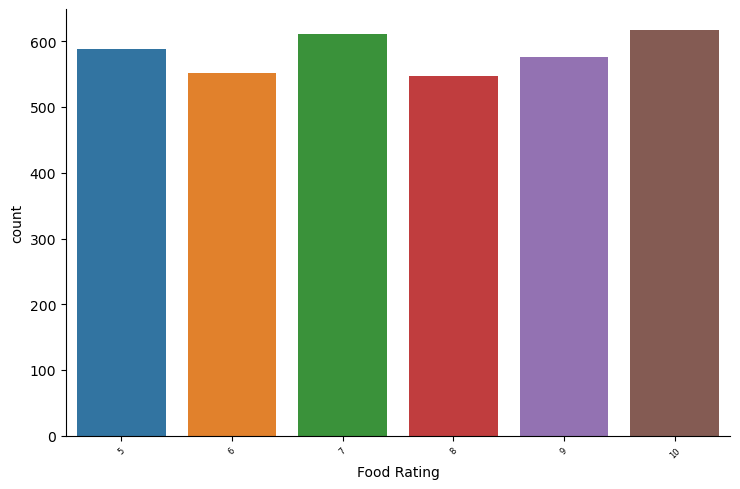

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

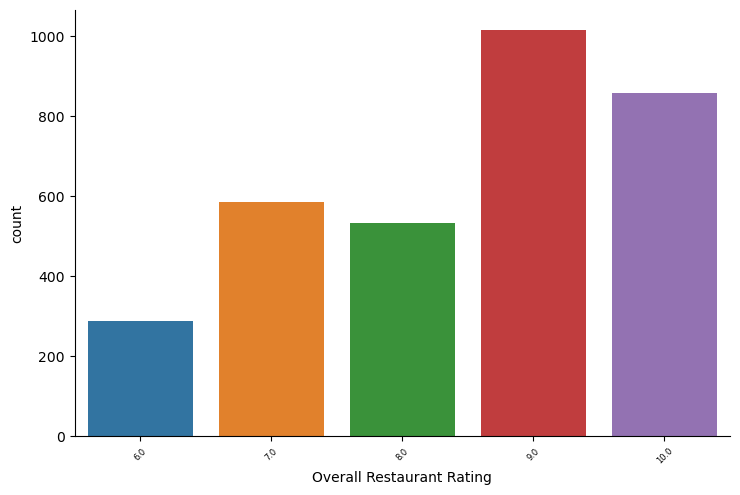

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

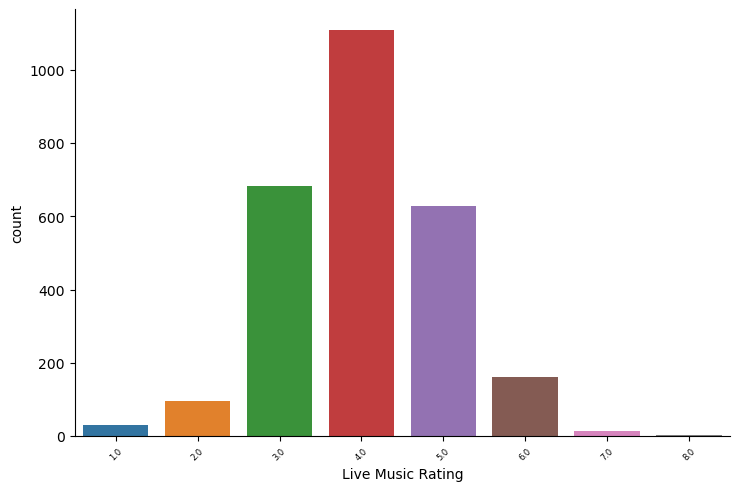

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

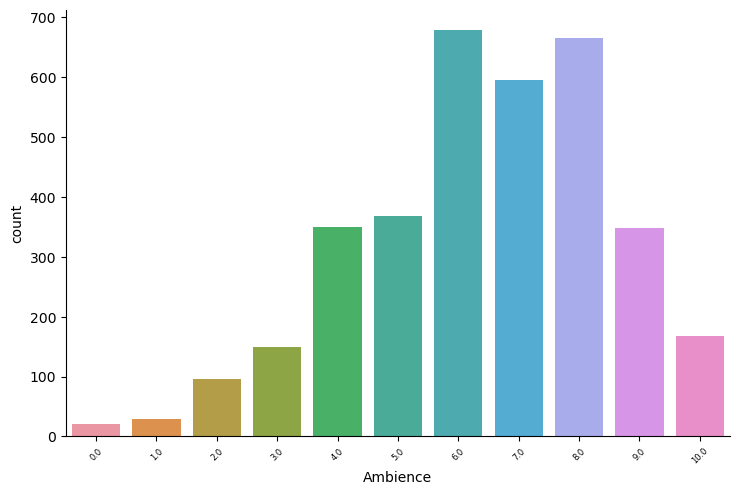

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

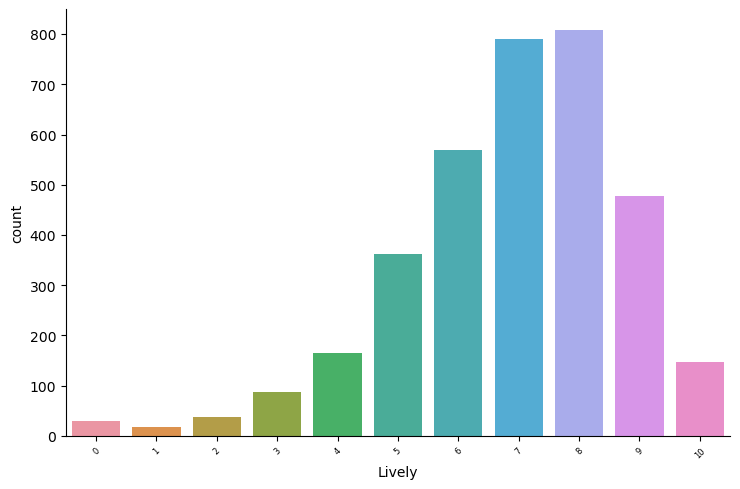

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

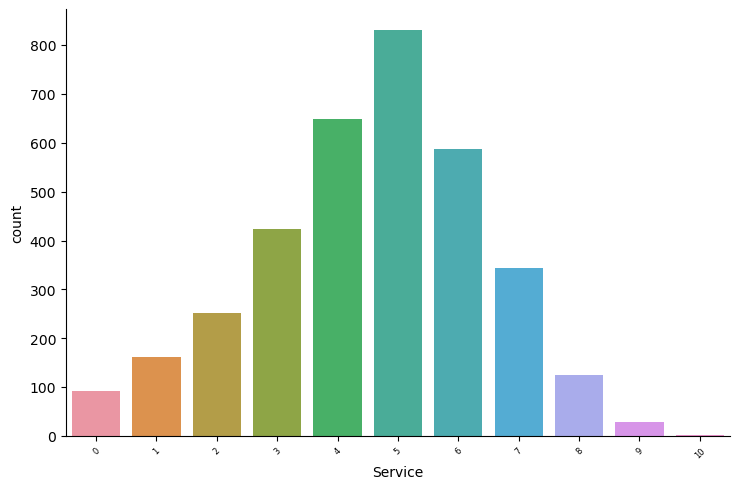

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

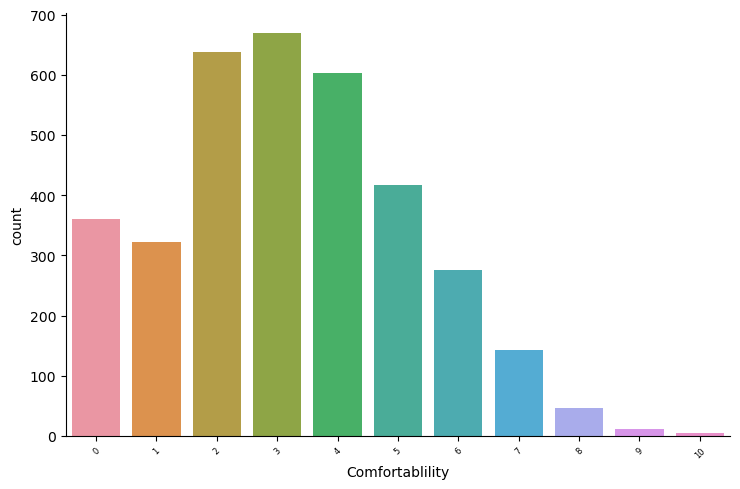

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

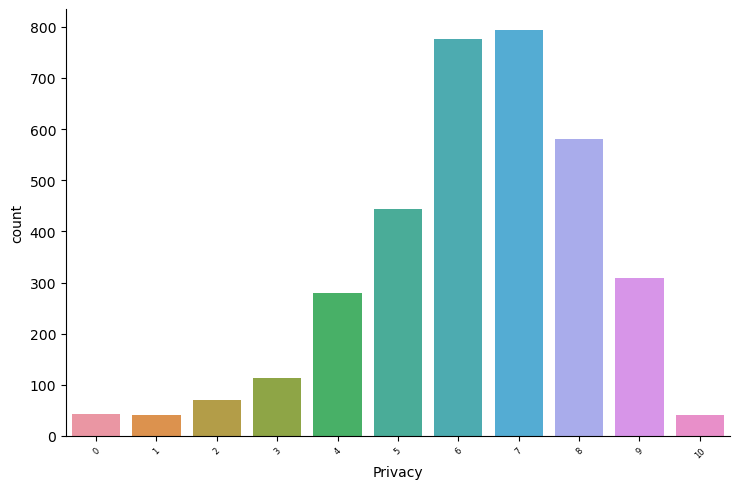

/Users/B0297340/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1700 with 0 Axes>

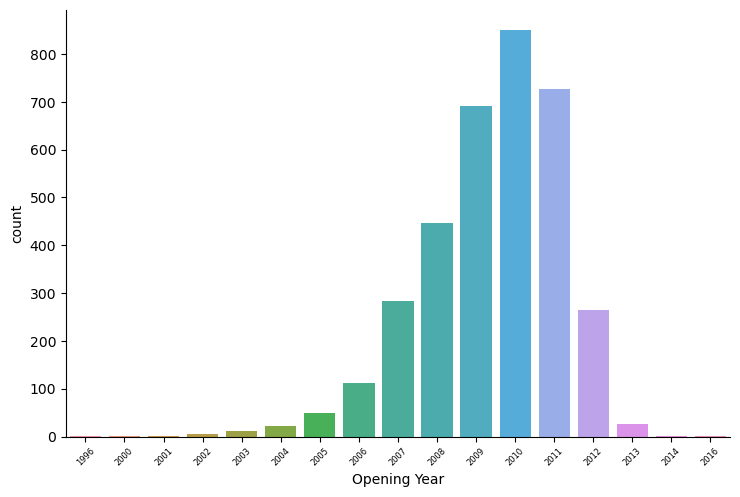

In [22]:
cat_variables = ['Cuisine','Restaurant Location', 'Endorsed By' , 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy', 'Opening Year' ]

for i in cat_variables:
    plt.figure(figsize=(25, 17))
    count_plot = sns.catplot(data=emputed_df, x=i, kind='count', aspect=1.5)
    # Rotate x-axis labels by 90 degrees
    count_plot.set_xticklabels(rotation=45,fontsize=6)
    plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

encoded_df = emputed_df.copy()

label_encoder = LabelEncoder()

# Fit label encoder and transform categories
for col in cat_variables : 
    encoded_df[col] = label_encoder.fit_transform(emputed_df[col])
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(col )
    print(label_mapping)

Cuisine
{'algerian,algerian': 0, 'algerian,belgian': 1, 'algerian,korean': 2, 'british,belgian': 3, 'british,japanese': 4, 'chinese,salvadorian': 5, 'cuban,british': 6, 'hawaiian,latvian': 7, 'indian,irish': 8, 'irish,belgian': 9, 'japanese,thai': 10, 'nigerian,cajun': 11, 'peruvian,cuban': 12, 'polish,jewish': 13, 'swedish,greek': 14, 'tibetan,greek': 15, 'tibetan,italian': 16, 'turkish,nigerian': 17, 'turkish,sapnish': 18, 'welsh,thai': 19}
Restaurant Location
{'Near Business Hub': 0, 'Near Party Hub': 1}
Endorsed By
{'Local Celebrity': 0, 'Not Specific': 1, 'Tier A Celebrity': 2}
Fire Audit
{0: 0, 1: 1}
Liquor License Obtained
{0: 0, 1: 1}
Situated in a Multi Complex
{0: 0, 1: 1}
Dedicated Parking
{0: 0, 1: 1}
Open Sitting Available
{0: 0, 1: 1}
Resturant Tier
{1.0: 0, 2.0: 1, nan: 2}
Restaurant Type
{'Bar': 0, 'Buffet/Family Restaurant': 1, 'Caffee': 2, 'Gastro Bar': 3}
Restaurant Theme
{"90's": 0, 'Ambiance': 1, 'Arabian': 2, 'Bakery': 3, 'Belise': 4, 'Benedicta': 5, 'Bettaso': 6,

In [24]:
encoded_df.dtypes

Registration Number                int64
Annual Turnover                    int64
Cuisine                            int64
Restaurant Location                int64
Facebook Popularity Quotient     float64
Endorsed By                        int64
Instagram Popularity Quotient    float64
Fire Audit                         int64
Liquor License Obtained            int64
Situated in a Multi Complex        int64
Dedicated Parking                  int64
Open Sitting Available             int64
Resturant Tier                     int64
Restaurant Type                    int64
Restaurant Theme                   int64
Restaurant Zomato Rating           int64
Restaurant City Tier               int64
Order Wait Time                    int64
Staff Responsivness                int64
Value for Money                    int64
Hygiene Rating                     int64
Food Rating                        int64
Overall Restaurant Rating          int64
Live Music Rating                  int64
Ambience        

In [25]:
encoded_df['Social Media Quotient'] = encoded_df['Facebook Popularity Quotient'] + encoded_df['Instagram Popularity Quotient']

In [26]:
encoded_df= encoded_df.drop(columns='Facebook Popularity Quotient' ,axis=1 )
encoded_df= encoded_df.drop(columns='Instagram Popularity Quotient' ,axis=1 )

In [27]:
from sklearn.impute import SimpleImputer, KNNImputer

num_cols = ['Annual Turnover', 'Social Media Quotient']


In [28]:
label_encoders = {}
for col in cat_variables:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    label_encoders[col] = le

# Combine all columns for imputation
all_cols = cat_variables + num_cols

# Create an instance of KNNImputer
knn_imputer = KNNImputer(n_neighbors=4)

# Impute missing values
encoded_df = pd.DataFrame(knn_imputer.fit_transform(encoded_df[all_cols]), columns=all_cols)

# Convert categorical variables back to original labels
for col in cat_variables:
    le = label_encoders[col]
    encoded_df[col] = le.inverse_transform(encoded_df[col].round().astype(int))

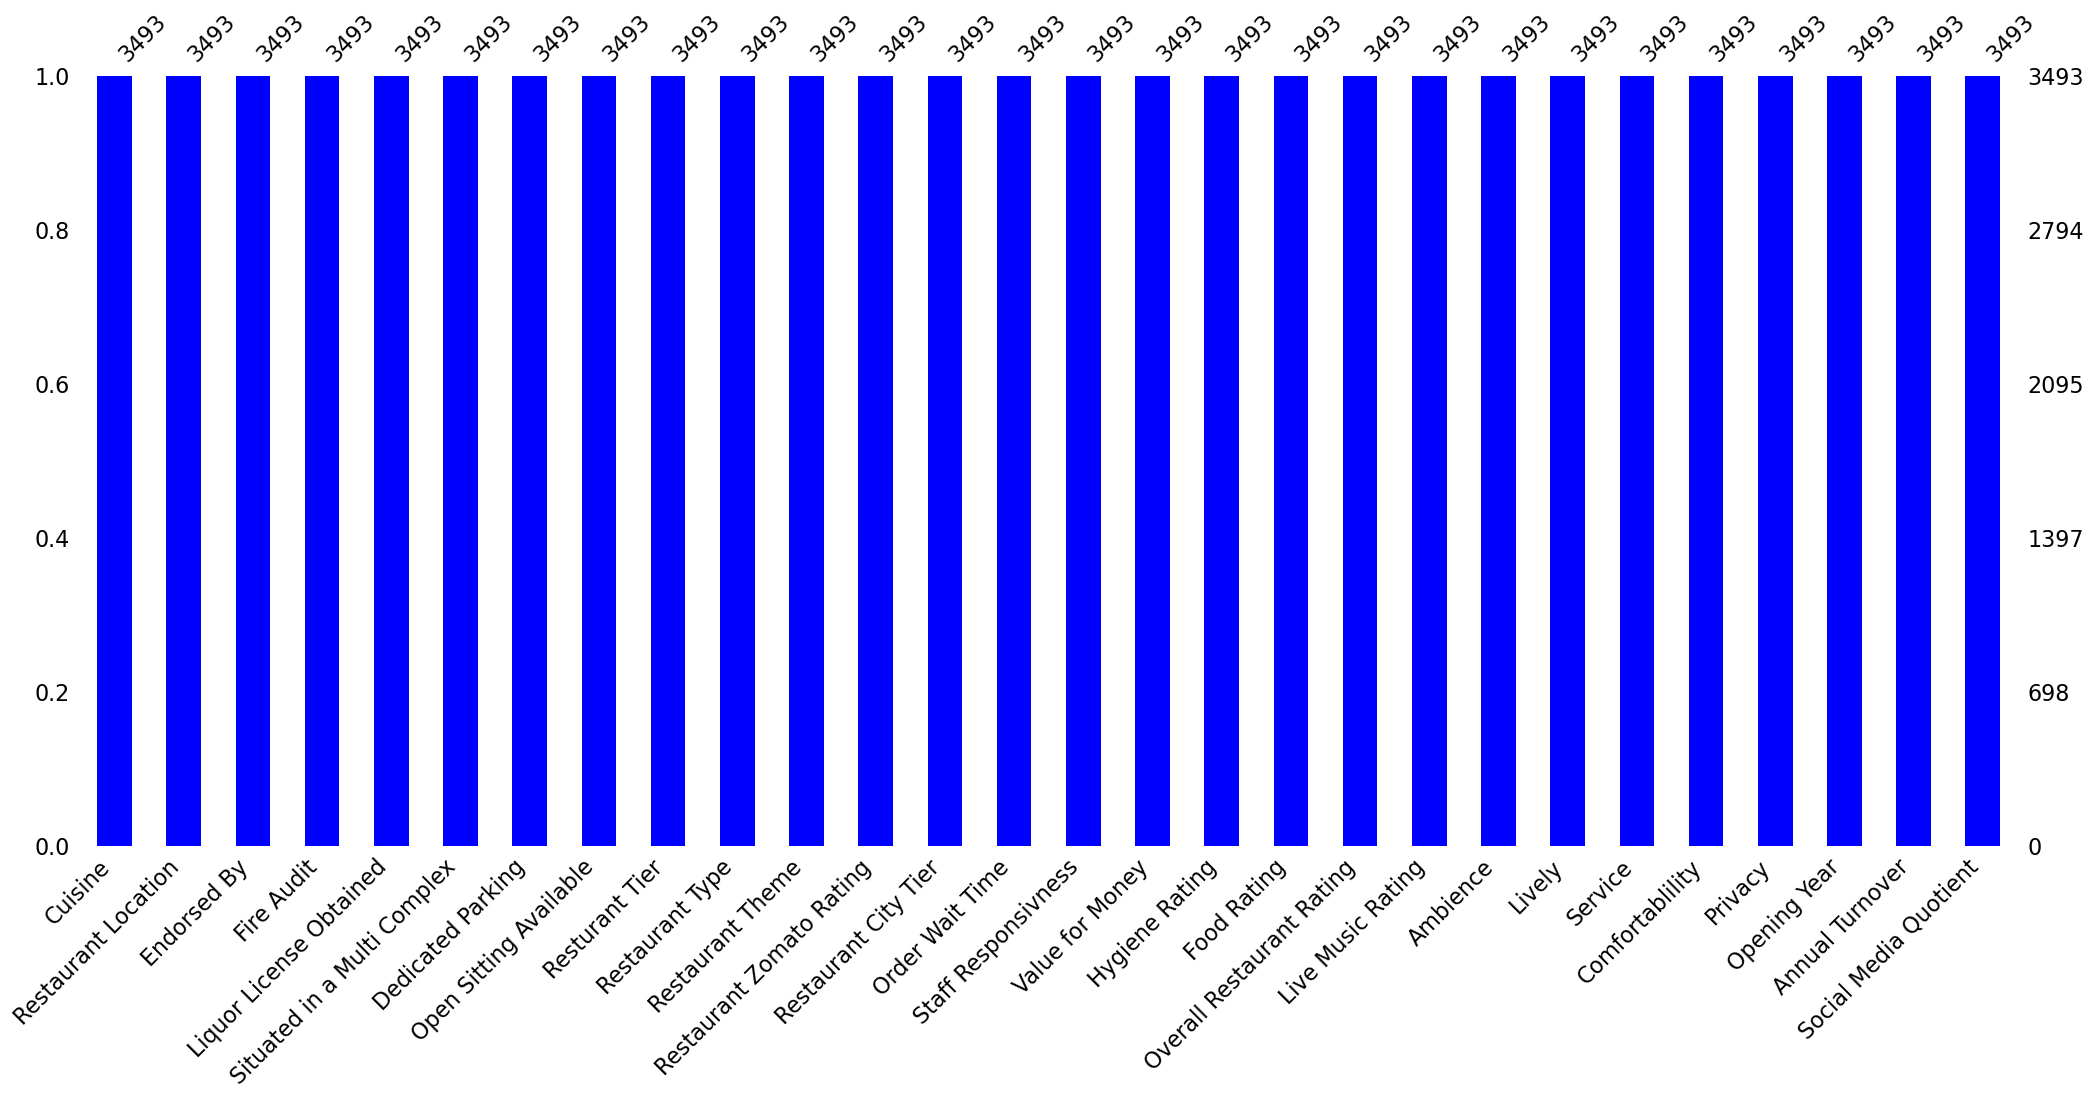

In [29]:
import missingno as msno

msno.bar(encoded_df, color ='blue');

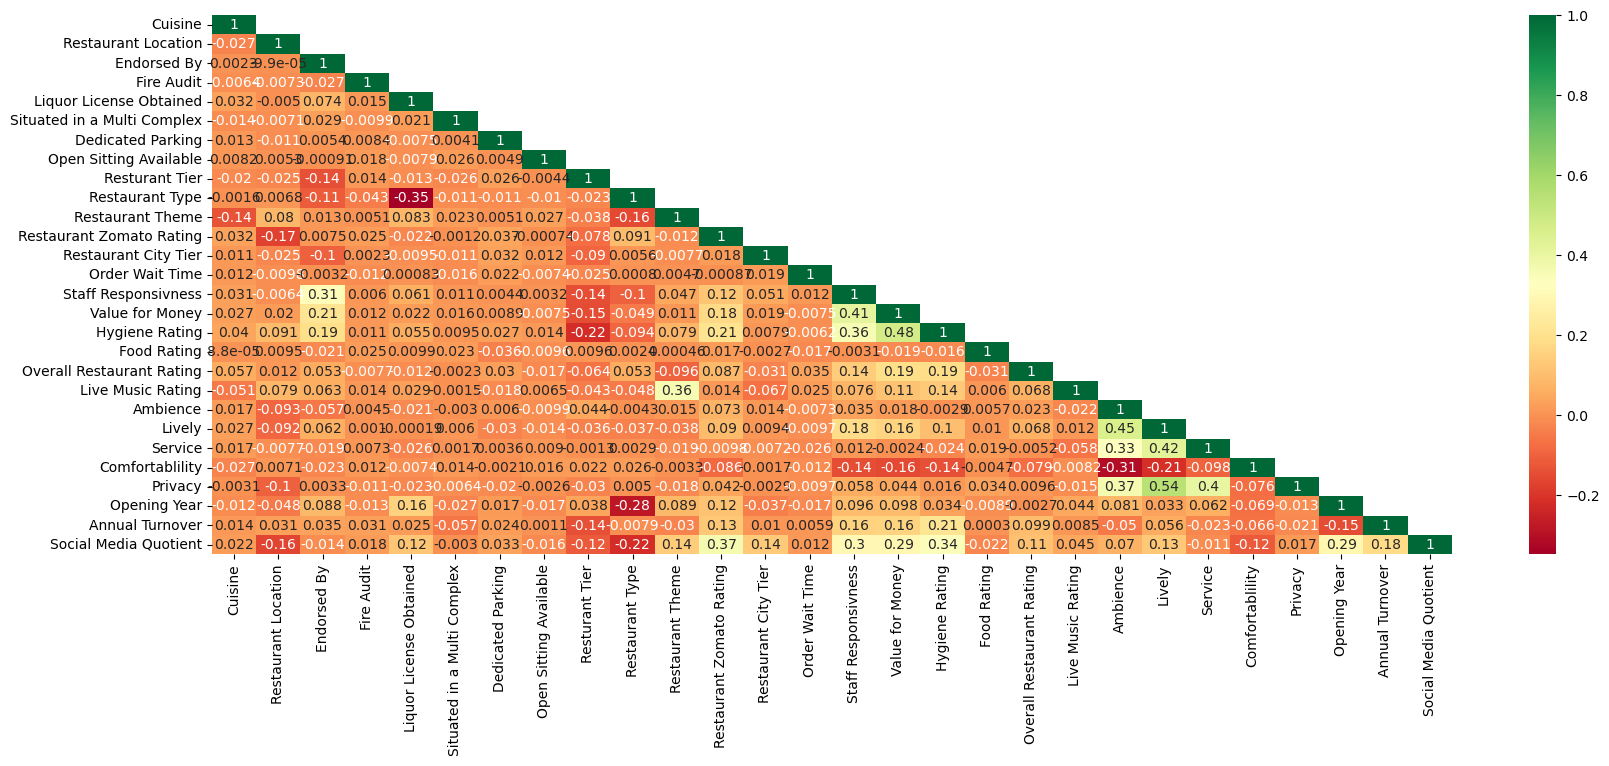

In [30]:
plt.figure(figsize=(20,7))
sns.heatmap(encoded_df.corr(),annot=True,mask=np.triu(encoded_df.corr(),+1),cmap='RdYlGn');

In [31]:
moderate_correlations, strong_correlations = filter_correlation(encoded_df)

print("Moderate Correlations:")
for corr in moderate_correlations:
    print(f"{corr[0]} - {corr[1]}: {corr[2]}")

print("\nStrong Correlations:")
for corr in strong_correlations:
    print(f"{corr[0]} - {corr[1]}: {corr[2]}")

Moderate Correlations:

Strong Correlations:


In [32]:
def hist_plot_grid(df, grid_size=(1, 3), figsize=(14, 4)) :
    num_variables = df.select_dtypes(include=['float64', 'int64']).columns
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=figsize)
    axes = axes.flatten()
    for i, col in enumerate(num_cols):
        if i < len(axes):  # Ensure there are enough subplots
            sns.histplot(df[col], kde=True, color='blue', ax=axes[i])
            axes[i].set_title(col)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')   

# Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

def box_plot_grid(df, grid_size=(1, 3), figsize=(14, 4)) :
    num_variables = df.select_dtypes(include=['float64', 'int64']).columns
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=figsize)
    axes = axes.flatten()
    for i, col in enumerate(num_cols):
        if i < len(axes):  # Ensure there are enough subplots
            sns.boxplot(x=df[col], ax=axes[i])
            axes[i].set_title(col)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')   

# Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

 
    
    

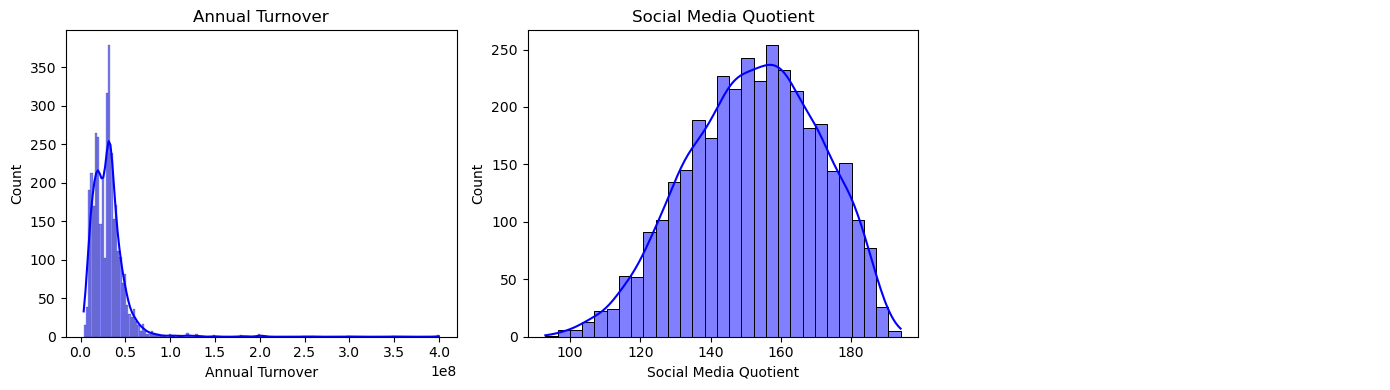

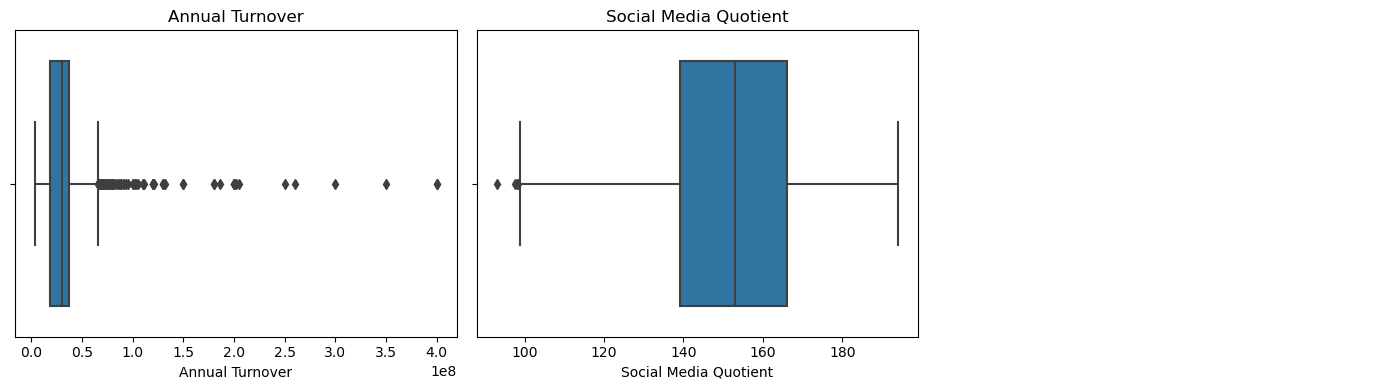

In [33]:
hist_plot_grid(encoded_df)
box_plot_grid(encoded_df)

# Prepare the Data

In [34]:
def convert_data_type_to_integer(df):
     # Check the initial data types
        cols = df.columns
        for col in cols :
            if(df[col].dtype=='object'):
                print("Initial Data Types:\n", df[col].dtypes)
                df[col] = pd.to_numeric(df[col], errors='coerce')
                df[col].fillna(0, inplace=True)  # Replace NaNs with 0, for example
                df[col] = df[col].astype(int)
                

  


In [35]:
convert_data_type_to_integer(encoded_df)

Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object
Initial Data Types:
 object


In [36]:
X= encoded_df.drop(['Annual Turnover'],axis=1)
y= encoded_df['Annual Turnover']

In [37]:
# Train and Test Split 

# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [38]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(2619, 27)

(874, 27)

(2619,)

(874,)

# Machine Learning Model Building for Prediction¶

In [39]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input

    start = time.time()  # note the start time

    model.fit(X_train, y_train)   # fit the model using the train data

    pred = model.predict(X_test)     # model predictions on the test data

    r2 = metrics.r2_score(y_test, pred)  # calculate the r squared value on the test data

    rmse = sqrt(metrics.mean_squared_error(y_test, pred))   # Root mean squared error

    rmsle = sqrt(metrics.mean_squared_log_error(y_test, pred))  # Root mean squared log error (since the numbers are huge)

    scorer = {'r2' : metrics.make_scorer(metrics.r2_score),
              'mse' : metrics.make_scorer(metrics.mean_squared_error),
              'msle' : metrics.make_scorer(metrics.mean_squared_log_error),
               }    # make scorers to be used in cross validation

    cv = cross_validate(model, X_train, y_train, cv=10, scoring = scorer)   # perform cross validation accross 3 metrics

    r2_cv = cv['test_r2'].mean()                                     # mean r squared value
    rmse_cv = np.mean([sqrt(mse) for mse in cv['test_mse']]) # mean RMSE value(take root of individual mse value and then mean)
    rmsle_cv = np.mean([sqrt(msle) for msle in cv['test_msle']]) # mean RMSLE

    end = time.time()  #note the end time


    duration = end - start  # calculate the total duration


    return r2, rmse, rmsle, r2_cv, rmse_cv, rmsle_cv, duration, pred  # return all the metrics along with predictions

In [40]:
conda install -c conda-forge lightgbm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [41]:
# the regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# methods and classes for evaluation
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time

In [42]:
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=1)
br = BaggingRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1, n_estimators=100)
gb = GradientBoostingRegressor(random_state=1, n_estimators=100)
xgb = XGBRegressor()
cgb = CatBoostRegressor()
lgb = LGBMRegressor()


result = {}   #Create an empty dictionary to later use to store metrics of each of the models

for model, name  in zip([lr, dt, br, rf,
                         gb, xgb, cgb, lgb], ['Linear Regression', 'Decision Tree','Bagging Ensemble', 'Random Forest',
                                              'Gradient Boost Ensemble', 'Xgboost', 'Catboost','LightGB']):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)

Learning rate set to 0.04767
0:	learn: 19446074.0571523	total: 47.4ms	remaining: 47.4s
1:	learn: 19326522.3983605	total: 48.3ms	remaining: 24.1s
2:	learn: 19255639.5761160	total: 49.3ms	remaining: 16.4s
3:	learn: 19165552.5558288	total: 50.1ms	remaining: 12.5s
4:	learn: 19066274.7040562	total: 50.9ms	remaining: 10.1s
5:	learn: 18979639.0570526	total: 51.9ms	remaining: 8.6s
6:	learn: 18903076.6766862	total: 52.9ms	remaining: 7.5s
7:	learn: 18831082.6153252	total: 53.7ms	remaining: 6.66s
8:	learn: 18764977.8343891	total: 54.7ms	remaining: 6.03s
9:	learn: 18711235.7447563	total: 55.6ms	remaining: 5.5s
10:	learn: 18652613.7831505	total: 56.5ms	remaining: 5.08s
11:	learn: 18589544.5840955	total: 57.5ms	remaining: 4.74s
12:	learn: 18526417.3701945	total: 58.4ms	remaining: 4.44s
13:	learn: 18471364.6136227	total: 59.3ms	remaining: 4.17s
14:	learn: 18431020.7793649	total: 60.3ms	remaining: 3.96s
15:	learn: 18376459.2534611	total: 61.2ms	remaining: 3.76s
16:	learn: 18305171.9912294	total: 62.1m

165:	learn: 15487316.8472436	total: 193ms	remaining: 972ms
166:	learn: 15457415.4607360	total: 194ms	remaining: 969ms
167:	learn: 15441182.8585630	total: 195ms	remaining: 966ms
168:	learn: 15430805.4824063	total: 196ms	remaining: 963ms
169:	learn: 15416766.7913738	total: 197ms	remaining: 959ms
170:	learn: 15407983.9196644	total: 197ms	remaining: 956ms
171:	learn: 15398450.3748522	total: 198ms	remaining: 953ms
172:	learn: 15388199.0655594	total: 199ms	remaining: 950ms
173:	learn: 15379998.3441733	total: 200ms	remaining: 948ms
174:	learn: 15374194.0352156	total: 200ms	remaining: 945ms
175:	learn: 15367945.8093544	total: 201ms	remaining: 942ms
176:	learn: 15356370.8357575	total: 202ms	remaining: 939ms
177:	learn: 15346572.2687459	total: 203ms	remaining: 936ms
178:	learn: 15341094.8054712	total: 204ms	remaining: 934ms
179:	learn: 15331712.2427954	total: 205ms	remaining: 932ms
180:	learn: 15309096.3153629	total: 206ms	remaining: 932ms
181:	learn: 15299576.7638186	total: 208ms	remaining: 933

404:	learn: 13081445.5634936	total: 389ms	remaining: 571ms
405:	learn: 13074614.7583851	total: 389ms	remaining: 570ms
406:	learn: 13068560.5129889	total: 390ms	remaining: 569ms
407:	learn: 13059204.4787285	total: 391ms	remaining: 567ms
408:	learn: 13058930.2784997	total: 392ms	remaining: 566ms
409:	learn: 13058665.3942922	total: 392ms	remaining: 565ms
410:	learn: 13048485.6841645	total: 393ms	remaining: 563ms
411:	learn: 13034692.0146583	total: 394ms	remaining: 562ms
412:	learn: 13027110.4855419	total: 395ms	remaining: 561ms
413:	learn: 13023886.1441981	total: 395ms	remaining: 560ms
414:	learn: 12997753.1030784	total: 396ms	remaining: 558ms
415:	learn: 12983575.8271423	total: 397ms	remaining: 557ms
416:	learn: 12983321.2268398	total: 398ms	remaining: 556ms
417:	learn: 12969209.2913563	total: 399ms	remaining: 555ms
418:	learn: 12960250.4326802	total: 400ms	remaining: 555ms
419:	learn: 12951542.7467699	total: 401ms	remaining: 554ms
420:	learn: 12951218.8970715	total: 402ms	remaining: 553

646:	learn: 10896537.4929025	total: 584ms	remaining: 319ms
647:	learn: 10889910.6684911	total: 585ms	remaining: 318ms
648:	learn: 10881491.9824231	total: 586ms	remaining: 317ms
649:	learn: 10862073.2768433	total: 586ms	remaining: 316ms
650:	learn: 10854413.4530824	total: 587ms	remaining: 315ms
651:	learn: 10854202.0947902	total: 588ms	remaining: 314ms
652:	learn: 10833025.4218609	total: 589ms	remaining: 313ms
653:	learn: 10829864.9687598	total: 590ms	remaining: 312ms
654:	learn: 10825733.5535541	total: 590ms	remaining: 311ms
655:	learn: 10819609.4582188	total: 591ms	remaining: 310ms
656:	learn: 10814447.9877778	total: 592ms	remaining: 309ms
657:	learn: 10803489.3300066	total: 593ms	remaining: 308ms
658:	learn: 10798447.9164855	total: 593ms	remaining: 307ms
659:	learn: 10789911.9894315	total: 594ms	remaining: 306ms
660:	learn: 10771695.4815026	total: 595ms	remaining: 305ms
661:	learn: 10763967.4045147	total: 596ms	remaining: 304ms
662:	learn: 10756252.2766937	total: 598ms	remaining: 304

890:	learn: 9283060.7488756	total: 780ms	remaining: 95.4ms
891:	learn: 9282705.8455668	total: 781ms	remaining: 94.5ms
892:	learn: 9276710.5962063	total: 781ms	remaining: 93.6ms
893:	learn: 9265469.7705992	total: 782ms	remaining: 92.7ms
894:	learn: 9259450.8281251	total: 783ms	remaining: 91.8ms
895:	learn: 9257079.2290363	total: 784ms	remaining: 91ms
896:	learn: 9254174.7397012	total: 784ms	remaining: 90.1ms
897:	learn: 9250330.6543484	total: 785ms	remaining: 89.2ms
898:	learn: 9247993.0474996	total: 786ms	remaining: 88.3ms
899:	learn: 9247858.7961350	total: 787ms	remaining: 87.4ms
900:	learn: 9247749.6983380	total: 787ms	remaining: 86.5ms
901:	learn: 9238477.8750022	total: 788ms	remaining: 85.6ms
902:	learn: 9234674.4821918	total: 789ms	remaining: 84.8ms
903:	learn: 9231484.0682798	total: 790ms	remaining: 83.9ms
904:	learn: 9219065.5094016	total: 791ms	remaining: 83.1ms
905:	learn: 9215347.9443313	total: 792ms	remaining: 82.2ms
906:	learn: 9209331.9780124	total: 793ms	remaining: 81.3ms

124:	learn: 15870680.7646601	total: 93ms	remaining: 651ms
125:	learn: 15847293.9805633	total: 93.9ms	remaining: 651ms
126:	learn: 15831532.6121379	total: 94.6ms	remaining: 650ms
127:	learn: 15827685.1468785	total: 95.3ms	remaining: 649ms
128:	learn: 15810668.7608414	total: 96.1ms	remaining: 649ms
129:	learn: 15796296.0978685	total: 96.8ms	remaining: 648ms
130:	learn: 15761473.7008997	total: 97.6ms	remaining: 647ms
131:	learn: 15754127.5893428	total: 98.3ms	remaining: 646ms
132:	learn: 15744325.5696222	total: 99ms	remaining: 645ms
133:	learn: 15721361.9353620	total: 99.6ms	remaining: 644ms
134:	learn: 15716268.3392616	total: 100ms	remaining: 643ms
135:	learn: 15710153.4473363	total: 101ms	remaining: 642ms
136:	learn: 15692622.5983039	total: 102ms	remaining: 641ms
137:	learn: 15685574.3955613	total: 103ms	remaining: 641ms
138:	learn: 15677182.1182478	total: 103ms	remaining: 641ms
139:	learn: 15668149.9271158	total: 104ms	remaining: 641ms
140:	learn: 15652187.1704144	total: 106ms	remainin

374:	learn: 13245156.3072019	total: 280ms	remaining: 466ms
375:	learn: 13222538.8479283	total: 281ms	remaining: 466ms
376:	learn: 13211013.3775690	total: 281ms	remaining: 465ms
377:	learn: 13206408.6317318	total: 282ms	remaining: 464ms
378:	learn: 13200080.5657523	total: 283ms	remaining: 463ms
379:	learn: 13194022.7918138	total: 283ms	remaining: 463ms
380:	learn: 13182879.8387243	total: 284ms	remaining: 462ms
381:	learn: 13157465.7420931	total: 285ms	remaining: 461ms
382:	learn: 13141150.3726706	total: 286ms	remaining: 460ms
383:	learn: 13131277.3364992	total: 286ms	remaining: 460ms
384:	learn: 13115949.9183766	total: 287ms	remaining: 459ms
385:	learn: 13103739.6626066	total: 288ms	remaining: 458ms
386:	learn: 13093593.9306032	total: 289ms	remaining: 458ms
387:	learn: 13083189.4395619	total: 290ms	remaining: 458ms
388:	learn: 13077230.8314792	total: 291ms	remaining: 457ms
389:	learn: 13066195.3909468	total: 292ms	remaining: 456ms
390:	learn: 13056533.8969469	total: 293ms	remaining: 456

634:	learn: 10701021.1283080	total: 475ms	remaining: 273ms
635:	learn: 10691315.2672718	total: 476ms	remaining: 272ms
636:	learn: 10684432.8410928	total: 476ms	remaining: 271ms
637:	learn: 10678253.1839597	total: 477ms	remaining: 271ms
638:	learn: 10678031.0608658	total: 478ms	remaining: 270ms
639:	learn: 10670574.1705918	total: 479ms	remaining: 269ms
640:	learn: 10658865.5962644	total: 479ms	remaining: 268ms
641:	learn: 10643018.7445475	total: 480ms	remaining: 268ms
642:	learn: 10639002.3245340	total: 481ms	remaining: 267ms
643:	learn: 10628005.2057344	total: 482ms	remaining: 266ms
644:	learn: 10620136.1002166	total: 482ms	remaining: 265ms
645:	learn: 10612465.1031358	total: 483ms	remaining: 265ms
646:	learn: 10606307.8831428	total: 484ms	remaining: 264ms
647:	learn: 10599138.1822927	total: 485ms	remaining: 263ms
648:	learn: 10591513.7790818	total: 485ms	remaining: 263ms
649:	learn: 10584676.4970923	total: 486ms	remaining: 262ms
650:	learn: 10571935.8935297	total: 487ms	remaining: 261

895:	learn: 8953783.7990569	total: 670ms	remaining: 77.7ms
896:	learn: 8948437.4323526	total: 671ms	remaining: 77ms
897:	learn: 8939049.5112302	total: 671ms	remaining: 76.3ms
898:	learn: 8933559.6163594	total: 672ms	remaining: 75.5ms
899:	learn: 8923022.4925107	total: 673ms	remaining: 74.8ms
900:	learn: 8918499.7904524	total: 674ms	remaining: 74ms
901:	learn: 8916491.9134490	total: 674ms	remaining: 73.3ms
902:	learn: 8909354.7004456	total: 675ms	remaining: 72.5ms
903:	learn: 8906161.9434701	total: 676ms	remaining: 71.8ms
904:	learn: 8901905.3107831	total: 677ms	remaining: 71ms
905:	learn: 8894494.5646748	total: 677ms	remaining: 70.3ms
906:	learn: 8890095.9293023	total: 678ms	remaining: 69.5ms
907:	learn: 8881998.5185641	total: 679ms	remaining: 68.8ms
908:	learn: 8877601.6783818	total: 680ms	remaining: 68ms
909:	learn: 8870894.8247330	total: 681ms	remaining: 67.3ms
910:	learn: 8865633.1243733	total: 681ms	remaining: 66.6ms
911:	learn: 8856613.0130073	total: 683ms	remaining: 65.9ms
912:	

136:	learn: 15725215.3026960	total: 104ms	remaining: 655ms
137:	learn: 15720431.7219846	total: 105ms	remaining: 654ms
138:	learn: 15712935.2512450	total: 106ms	remaining: 654ms
139:	learn: 15695655.5082437	total: 106ms	remaining: 652ms
140:	learn: 15689147.4520463	total: 107ms	remaining: 651ms
141:	learn: 15680262.7375362	total: 108ms	remaining: 650ms
142:	learn: 15645445.8172768	total: 108ms	remaining: 649ms
143:	learn: 15629188.4154418	total: 109ms	remaining: 648ms
144:	learn: 15621474.5815290	total: 110ms	remaining: 648ms
145:	learn: 15606603.2636035	total: 111ms	remaining: 647ms
146:	learn: 15600820.1300744	total: 111ms	remaining: 646ms
147:	learn: 15581947.2300230	total: 112ms	remaining: 645ms
148:	learn: 15567527.2116947	total: 113ms	remaining: 644ms
149:	learn: 15545165.6579069	total: 114ms	remaining: 643ms
150:	learn: 15528459.9672780	total: 114ms	remaining: 643ms
151:	learn: 15524216.8643979	total: 115ms	remaining: 644ms
152:	learn: 15518772.2886396	total: 116ms	remaining: 645

399:	learn: 12890208.7769030	total: 299ms	remaining: 448ms
400:	learn: 12886695.4304710	total: 300ms	remaining: 447ms
401:	learn: 12869882.6357134	total: 300ms	remaining: 447ms
402:	learn: 12847433.5857305	total: 301ms	remaining: 446ms
403:	learn: 12839916.5482575	total: 302ms	remaining: 445ms
404:	learn: 12831349.3617726	total: 303ms	remaining: 444ms
405:	learn: 12804640.6658186	total: 303ms	remaining: 444ms
406:	learn: 12788404.4774797	total: 304ms	remaining: 443ms
407:	learn: 12779729.4993055	total: 305ms	remaining: 442ms
408:	learn: 12779308.9632611	total: 305ms	remaining: 441ms
409:	learn: 12775116.4630948	total: 306ms	remaining: 440ms
410:	learn: 12767151.0828245	total: 307ms	remaining: 440ms
411:	learn: 12766832.3850943	total: 308ms	remaining: 439ms
412:	learn: 12766503.4232589	total: 308ms	remaining: 438ms
413:	learn: 12754467.0339670	total: 309ms	remaining: 437ms
414:	learn: 12750207.6137501	total: 310ms	remaining: 436ms
415:	learn: 12749882.6795243	total: 310ms	remaining: 436

655:	learn: 10514608.9714664	total: 494ms	remaining: 259ms
656:	learn: 10507243.5584623	total: 495ms	remaining: 259ms
657:	learn: 10502918.0376375	total: 496ms	remaining: 258ms
658:	learn: 10483628.0984581	total: 497ms	remaining: 257ms
659:	learn: 10475503.3814240	total: 497ms	remaining: 256ms
660:	learn: 10463876.7161492	total: 498ms	remaining: 255ms
661:	learn: 10450610.4010898	total: 499ms	remaining: 255ms
662:	learn: 10443329.2650833	total: 500ms	remaining: 254ms
663:	learn: 10432125.8034186	total: 500ms	remaining: 253ms
664:	learn: 10422741.8468483	total: 501ms	remaining: 252ms
665:	learn: 10420819.0437897	total: 502ms	remaining: 252ms
666:	learn: 10414157.9535735	total: 502ms	remaining: 251ms
667:	learn: 10396461.7749350	total: 503ms	remaining: 250ms
668:	learn: 10387887.7599224	total: 504ms	remaining: 249ms
669:	learn: 10377874.3998944	total: 505ms	remaining: 249ms
670:	learn: 10370947.6483504	total: 506ms	remaining: 248ms
671:	learn: 10361862.4960698	total: 506ms	remaining: 247

912:	learn: 8784397.1995074	total: 690ms	remaining: 65.7ms
913:	learn: 8784268.8072501	total: 690ms	remaining: 65ms
914:	learn: 8779768.4127291	total: 691ms	remaining: 64.2ms
915:	learn: 8773396.1372995	total: 692ms	remaining: 63.5ms
916:	learn: 8773291.8421457	total: 693ms	remaining: 62.7ms
917:	learn: 8761728.9574222	total: 693ms	remaining: 61.9ms
918:	learn: 8761608.3866896	total: 694ms	remaining: 61.2ms
919:	learn: 8758030.4021027	total: 695ms	remaining: 60.4ms
920:	learn: 8753133.3897924	total: 696ms	remaining: 59.7ms
921:	learn: 8743108.3565965	total: 696ms	remaining: 58.9ms
922:	learn: 8737089.3655826	total: 697ms	remaining: 58.1ms
923:	learn: 8736973.9972977	total: 698ms	remaining: 57.4ms
924:	learn: 8733059.6455787	total: 698ms	remaining: 56.6ms
925:	learn: 8724311.2753569	total: 699ms	remaining: 55.9ms
926:	learn: 8719844.9245646	total: 700ms	remaining: 55.1ms
927:	learn: 8715855.0754554	total: 701ms	remaining: 54.4ms
928:	learn: 8701366.4949967	total: 701ms	remaining: 53.6ms

153:	learn: 15002135.2170519	total: 116ms	remaining: 639ms
154:	learn: 14992077.8755406	total: 117ms	remaining: 639ms
155:	learn: 14980590.6467670	total: 118ms	remaining: 638ms
156:	learn: 14971549.7246977	total: 119ms	remaining: 637ms
157:	learn: 14960277.6655441	total: 119ms	remaining: 636ms
158:	learn: 14955027.7933191	total: 120ms	remaining: 635ms
159:	learn: 14954611.0753055	total: 120ms	remaining: 631ms
160:	learn: 14946284.3589375	total: 121ms	remaining: 631ms
161:	learn: 14933046.0171945	total: 122ms	remaining: 630ms
162:	learn: 14928634.2088047	total: 122ms	remaining: 629ms
163:	learn: 14917660.7985764	total: 123ms	remaining: 628ms
164:	learn: 14902269.4425522	total: 124ms	remaining: 627ms
165:	learn: 14877084.4541670	total: 125ms	remaining: 626ms
166:	learn: 14856577.5148072	total: 125ms	remaining: 626ms
167:	learn: 14853254.6518763	total: 126ms	remaining: 625ms
168:	learn: 14832982.0506491	total: 127ms	remaining: 626ms
169:	learn: 14814435.4716463	total: 128ms	remaining: 626

417:	learn: 12453245.9920265	total: 311ms	remaining: 434ms
418:	learn: 12448336.0698768	total: 312ms	remaining: 433ms
419:	learn: 12448016.9429914	total: 313ms	remaining: 432ms
420:	learn: 12427947.7818180	total: 314ms	remaining: 431ms
421:	learn: 12412639.8777392	total: 314ms	remaining: 431ms
422:	learn: 12412360.9103582	total: 315ms	remaining: 430ms
423:	learn: 12407032.7258008	total: 316ms	remaining: 429ms
424:	learn: 12396261.6568880	total: 317ms	remaining: 428ms
425:	learn: 12390991.7192183	total: 317ms	remaining: 428ms
426:	learn: 12371288.3538668	total: 318ms	remaining: 427ms
427:	learn: 12363128.8144210	total: 319ms	remaining: 426ms
428:	learn: 12342411.1611959	total: 320ms	remaining: 425ms
429:	learn: 12334663.2977427	total: 320ms	remaining: 425ms
430:	learn: 12333134.5198069	total: 321ms	remaining: 424ms
431:	learn: 12327670.0621188	total: 322ms	remaining: 424ms
432:	learn: 12320547.5317841	total: 323ms	remaining: 423ms
433:	learn: 12308221.4590122	total: 324ms	remaining: 423

676:	learn: 10307370.4421822	total: 507ms	remaining: 242ms
677:	learn: 10303602.6244280	total: 508ms	remaining: 241ms
678:	learn: 10296897.2754906	total: 509ms	remaining: 240ms
679:	learn: 10292536.8413925	total: 509ms	remaining: 240ms
680:	learn: 10282950.8926512	total: 510ms	remaining: 239ms
681:	learn: 10276059.4371047	total: 511ms	remaining: 238ms
682:	learn: 10267964.7807646	total: 512ms	remaining: 237ms
683:	learn: 10260862.8150036	total: 512ms	remaining: 237ms
684:	learn: 10258085.3611109	total: 513ms	remaining: 236ms
685:	learn: 10246885.2877414	total: 514ms	remaining: 235ms
686:	learn: 10237484.9714687	total: 514ms	remaining: 234ms
687:	learn: 10229397.3490594	total: 515ms	remaining: 234ms
688:	learn: 10221486.9537175	total: 516ms	remaining: 233ms
689:	learn: 10210760.1266310	total: 517ms	remaining: 232ms
690:	learn: 10199809.8074937	total: 518ms	remaining: 232ms
691:	learn: 10186529.3589032	total: 519ms	remaining: 231ms
692:	learn: 10178700.4797898	total: 520ms	remaining: 230

934:	learn: 8548812.7742381	total: 702ms	remaining: 48.8ms
935:	learn: 8544978.4171997	total: 703ms	remaining: 48.1ms
936:	learn: 8539488.7290167	total: 704ms	remaining: 47.3ms
937:	learn: 8533889.0352658	total: 704ms	remaining: 46.6ms
938:	learn: 8528299.9341890	total: 705ms	remaining: 45.8ms
939:	learn: 8525075.7194071	total: 706ms	remaining: 45ms
940:	learn: 8516434.2882018	total: 706ms	remaining: 44.3ms
941:	learn: 8503027.3074569	total: 707ms	remaining: 43.5ms
942:	learn: 8494068.3287239	total: 708ms	remaining: 42.8ms
943:	learn: 8486285.8782356	total: 709ms	remaining: 42ms
944:	learn: 8479831.3216909	total: 710ms	remaining: 41.3ms
945:	learn: 8474927.7796652	total: 710ms	remaining: 40.5ms
946:	learn: 8468653.9739304	total: 711ms	remaining: 39.8ms
947:	learn: 8457621.4323582	total: 712ms	remaining: 39ms
948:	learn: 8450252.5685159	total: 712ms	remaining: 38.3ms
949:	learn: 8444121.0953921	total: 713ms	remaining: 37.5ms
950:	learn: 8437503.7670323	total: 714ms	remaining: 36.8ms
951

171:	learn: 15460883.2818541	total: 131ms	remaining: 632ms
172:	learn: 15451841.1017326	total: 132ms	remaining: 632ms
173:	learn: 15447623.6059601	total: 133ms	remaining: 631ms
174:	learn: 15441365.9387931	total: 134ms	remaining: 630ms
175:	learn: 15436572.9799631	total: 134ms	remaining: 629ms
176:	learn: 15414777.1803711	total: 135ms	remaining: 628ms
177:	learn: 15401046.6668908	total: 136ms	remaining: 627ms
178:	learn: 15379953.1458971	total: 137ms	remaining: 626ms
179:	learn: 15362942.7475257	total: 137ms	remaining: 625ms
180:	learn: 15345088.4052648	total: 138ms	remaining: 625ms
181:	learn: 15340015.4260976	total: 139ms	remaining: 624ms
182:	learn: 15334216.8268247	total: 139ms	remaining: 623ms
183:	learn: 15329640.5476114	total: 140ms	remaining: 622ms
184:	learn: 15314368.3510937	total: 141ms	remaining: 621ms
185:	learn: 15297281.1459110	total: 142ms	remaining: 620ms
186:	learn: 15292946.6306092	total: 143ms	remaining: 620ms
187:	learn: 15291888.4129374	total: 143ms	remaining: 619

420:	learn: 12924334.1424952	total: 321ms	remaining: 441ms
421:	learn: 12923958.6056842	total: 322ms	remaining: 441ms
422:	learn: 12912964.8285062	total: 323ms	remaining: 440ms
423:	learn: 12905107.9966202	total: 323ms	remaining: 439ms
424:	learn: 12895881.6566815	total: 324ms	remaining: 438ms
425:	learn: 12895432.6758607	total: 325ms	remaining: 438ms
426:	learn: 12887862.6685331	total: 326ms	remaining: 437ms
427:	learn: 12865173.2122832	total: 326ms	remaining: 436ms
428:	learn: 12849080.5394714	total: 327ms	remaining: 435ms
429:	learn: 12848679.0009960	total: 328ms	remaining: 434ms
430:	learn: 12837110.3868643	total: 328ms	remaining: 434ms
431:	learn: 12832356.0370252	total: 329ms	remaining: 433ms
432:	learn: 12819443.5912449	total: 330ms	remaining: 432ms
433:	learn: 12819099.4757090	total: 331ms	remaining: 431ms
434:	learn: 12809100.3280205	total: 331ms	remaining: 430ms
435:	learn: 12802864.8924165	total: 332ms	remaining: 430ms
436:	learn: 12793948.1698265	total: 333ms	remaining: 429

681:	learn: 10632002.3299268	total: 516ms	remaining: 241ms
682:	learn: 10627385.0699233	total: 517ms	remaining: 240ms
683:	learn: 10623696.7353007	total: 518ms	remaining: 239ms
684:	learn: 10607077.1540570	total: 519ms	remaining: 239ms
685:	learn: 10603434.1622641	total: 520ms	remaining: 238ms
686:	learn: 10600140.6143434	total: 520ms	remaining: 237ms
687:	learn: 10596247.4872026	total: 521ms	remaining: 236ms
688:	learn: 10585375.1537109	total: 522ms	remaining: 236ms
689:	learn: 10581292.8960784	total: 522ms	remaining: 235ms
690:	learn: 10576575.0087504	total: 523ms	remaining: 234ms
691:	learn: 10572195.1133380	total: 524ms	remaining: 233ms
692:	learn: 10554191.7191722	total: 525ms	remaining: 233ms
693:	learn: 10550148.5023037	total: 526ms	remaining: 232ms
694:	learn: 10543767.1610963	total: 527ms	remaining: 231ms
695:	learn: 10540117.9102184	total: 528ms	remaining: 231ms
696:	learn: 10533951.4842614	total: 529ms	remaining: 230ms
697:	learn: 10513930.5898990	total: 530ms	remaining: 229

941:	learn: 8783204.3085515	total: 712ms	remaining: 43.8ms
942:	learn: 8772543.6796693	total: 713ms	remaining: 43.1ms
943:	learn: 8769138.7695681	total: 714ms	remaining: 42.3ms
944:	learn: 8767747.8084268	total: 714ms	remaining: 41.6ms
945:	learn: 8764001.4082006	total: 715ms	remaining: 40.8ms
946:	learn: 8754627.7314302	total: 716ms	remaining: 40.1ms
947:	learn: 8747316.5521553	total: 717ms	remaining: 39.3ms
948:	learn: 8740546.7792866	total: 717ms	remaining: 38.6ms
949:	learn: 8735663.0241989	total: 718ms	remaining: 37.8ms
950:	learn: 8730678.1117300	total: 719ms	remaining: 37ms
951:	learn: 8723066.4714923	total: 719ms	remaining: 36.3ms
952:	learn: 8717592.7873133	total: 721ms	remaining: 35.6ms
953:	learn: 8708547.8744956	total: 722ms	remaining: 34.8ms
954:	learn: 8704014.8223361	total: 723ms	remaining: 34ms
955:	learn: 8700889.7530827	total: 723ms	remaining: 33.3ms
956:	learn: 8698122.1290572	total: 724ms	remaining: 32.5ms
957:	learn: 8692463.0957446	total: 725ms	remaining: 31.8ms
9

181:	learn: 14276792.3986993	total: 137ms	remaining: 617ms
182:	learn: 14270497.4762026	total: 138ms	remaining: 617ms
183:	learn: 14244037.8480000	total: 139ms	remaining: 616ms
184:	learn: 14239683.7766059	total: 140ms	remaining: 615ms
185:	learn: 14234644.2298418	total: 140ms	remaining: 614ms
186:	learn: 14220208.2016105	total: 141ms	remaining: 614ms
187:	learn: 14215679.3218279	total: 142ms	remaining: 613ms
188:	learn: 14203063.9067611	total: 143ms	remaining: 612ms
189:	learn: 14192254.3943818	total: 143ms	remaining: 611ms
190:	learn: 14187880.6044087	total: 144ms	remaining: 610ms
191:	learn: 14181239.4634452	total: 145ms	remaining: 609ms
192:	learn: 14172266.8485562	total: 146ms	remaining: 608ms
193:	learn: 14166226.0441873	total: 146ms	remaining: 607ms
194:	learn: 14154464.9916933	total: 147ms	remaining: 607ms
195:	learn: 14150924.1584883	total: 148ms	remaining: 607ms
196:	learn: 14139033.6988580	total: 150ms	remaining: 610ms
197:	learn: 14132365.6133482	total: 151ms	remaining: 610

440:	learn: 11625229.3588835	total: 333ms	remaining: 422ms
441:	learn: 11615955.1284811	total: 334ms	remaining: 422ms
442:	learn: 11615618.9424403	total: 335ms	remaining: 421ms
443:	learn: 11615338.1456516	total: 335ms	remaining: 420ms
444:	learn: 11604982.6285424	total: 336ms	remaining: 419ms
445:	learn: 11600954.0323060	total: 337ms	remaining: 419ms
446:	learn: 11600603.0892339	total: 338ms	remaining: 418ms
447:	learn: 11599010.9936542	total: 338ms	remaining: 417ms
448:	learn: 11590232.4291573	total: 339ms	remaining: 416ms
449:	learn: 11571814.0553718	total: 340ms	remaining: 416ms
450:	learn: 11561108.6322885	total: 341ms	remaining: 415ms
451:	learn: 11547295.2981358	total: 341ms	remaining: 414ms
452:	learn: 11543504.0232565	total: 342ms	remaining: 413ms
453:	learn: 11535970.0298815	total: 343ms	remaining: 412ms
454:	learn: 11526516.5898925	total: 344ms	remaining: 412ms
455:	learn: 11526144.5910396	total: 345ms	remaining: 411ms
456:	learn: 11503793.4931246	total: 346ms	remaining: 411

697:	learn: 9632145.0419929	total: 528ms	remaining: 228ms
698:	learn: 9624605.8499328	total: 529ms	remaining: 228ms
699:	learn: 9621115.0845704	total: 530ms	remaining: 227ms
700:	learn: 9613251.3406788	total: 530ms	remaining: 226ms
701:	learn: 9609706.5013150	total: 531ms	remaining: 225ms
702:	learn: 9602866.3709461	total: 532ms	remaining: 225ms
703:	learn: 9602672.1659763	total: 532ms	remaining: 224ms
704:	learn: 9600471.9809747	total: 533ms	remaining: 223ms
705:	learn: 9591996.9574495	total: 534ms	remaining: 222ms
706:	learn: 9588903.6021187	total: 534ms	remaining: 221ms
707:	learn: 9584148.4953809	total: 535ms	remaining: 221ms
708:	learn: 9574150.6963727	total: 536ms	remaining: 220ms
709:	learn: 9571038.2916443	total: 537ms	remaining: 219ms
710:	learn: 9570907.5712637	total: 537ms	remaining: 218ms
711:	learn: 9559850.0938783	total: 538ms	remaining: 218ms
712:	learn: 9555017.8140121	total: 539ms	remaining: 217ms
713:	learn: 9543937.4442270	total: 540ms	remaining: 216ms
714:	learn: 95

953:	learn: 8149383.1478163	total: 723ms	remaining: 34.9ms
954:	learn: 8147075.9856709	total: 724ms	remaining: 34.1ms
955:	learn: 8144820.1023249	total: 725ms	remaining: 33.4ms
956:	learn: 8137556.4915132	total: 726ms	remaining: 32.6ms
957:	learn: 8129837.7569665	total: 726ms	remaining: 31.8ms
958:	learn: 8118330.4954424	total: 727ms	remaining: 31.1ms
959:	learn: 8110287.2500091	total: 728ms	remaining: 30.3ms
960:	learn: 8102623.3867023	total: 729ms	remaining: 29.6ms
961:	learn: 8094493.9727608	total: 729ms	remaining: 28.8ms
962:	learn: 8094367.2351836	total: 730ms	remaining: 28.1ms
963:	learn: 8089753.4464388	total: 731ms	remaining: 27.3ms
964:	learn: 8080619.3618035	total: 732ms	remaining: 26.5ms
965:	learn: 8077537.9280810	total: 733ms	remaining: 25.8ms
966:	learn: 8071236.8608218	total: 734ms	remaining: 25ms
967:	learn: 8066878.4285627	total: 735ms	remaining: 24.3ms
968:	learn: 8057463.2279103	total: 736ms	remaining: 23.5ms
969:	learn: 8050396.3539848	total: 737ms	remaining: 22.8ms

194:	learn: 15003167.1037383	total: 146ms	remaining: 604ms
195:	learn: 14994030.0897491	total: 147ms	remaining: 604ms
196:	learn: 14951992.0714398	total: 148ms	remaining: 603ms
197:	learn: 14948331.4000736	total: 149ms	remaining: 602ms
198:	learn: 14941062.4409967	total: 149ms	remaining: 601ms
199:	learn: 14928527.5060746	total: 150ms	remaining: 600ms
200:	learn: 14924469.0733952	total: 151ms	remaining: 599ms
201:	learn: 14912974.6147065	total: 151ms	remaining: 598ms
202:	learn: 14886992.4606436	total: 152ms	remaining: 597ms
203:	learn: 14882631.0005001	total: 153ms	remaining: 596ms
204:	learn: 14880788.0643270	total: 154ms	remaining: 595ms
205:	learn: 14879024.3599194	total: 154ms	remaining: 594ms
206:	learn: 14877864.0437403	total: 155ms	remaining: 593ms
207:	learn: 14874869.3043301	total: 156ms	remaining: 592ms
208:	learn: 14873710.7603582	total: 156ms	remaining: 591ms
209:	learn: 14873137.3286292	total: 157ms	remaining: 590ms
210:	learn: 14868670.0313379	total: 158ms	remaining: 590

454:	learn: 12171827.6612529	total: 342ms	remaining: 409ms
455:	learn: 12165208.4577882	total: 343ms	remaining: 409ms
456:	learn: 12150492.6948918	total: 343ms	remaining: 408ms
457:	learn: 12142612.3399518	total: 344ms	remaining: 407ms
458:	learn: 12131309.9670759	total: 345ms	remaining: 406ms
459:	learn: 12120064.3280337	total: 346ms	remaining: 406ms
460:	learn: 12110636.0543970	total: 346ms	remaining: 405ms
461:	learn: 12105225.6996932	total: 347ms	remaining: 404ms
462:	learn: 12099269.1526038	total: 348ms	remaining: 403ms
463:	learn: 12091935.4702343	total: 348ms	remaining: 403ms
464:	learn: 12085068.1654791	total: 349ms	remaining: 402ms
465:	learn: 12075670.6495931	total: 350ms	remaining: 401ms
466:	learn: 12065269.9721094	total: 351ms	remaining: 400ms
467:	learn: 12036035.1405861	total: 352ms	remaining: 400ms
468:	learn: 12030750.8482309	total: 352ms	remaining: 399ms
469:	learn: 12023045.1387831	total: 353ms	remaining: 399ms
470:	learn: 12007519.6782857	total: 354ms	remaining: 398

710:	learn: 9880768.7069882	total: 537ms	remaining: 218ms
711:	learn: 9873189.8058442	total: 538ms	remaining: 218ms
712:	learn: 9868626.0892779	total: 539ms	remaining: 217ms
713:	learn: 9855163.0820342	total: 540ms	remaining: 216ms
714:	learn: 9848982.6244329	total: 540ms	remaining: 215ms
715:	learn: 9832804.5718142	total: 541ms	remaining: 215ms
716:	learn: 9830158.3684069	total: 542ms	remaining: 214ms
717:	learn: 9826731.5443856	total: 543ms	remaining: 213ms
718:	learn: 9819688.4476858	total: 543ms	remaining: 212ms
719:	learn: 9811721.1802032	total: 544ms	remaining: 212ms
720:	learn: 9804681.6019799	total: 545ms	remaining: 211ms
721:	learn: 9797980.5358195	total: 546ms	remaining: 210ms
722:	learn: 9793511.9362001	total: 546ms	remaining: 209ms
723:	learn: 9787309.2171787	total: 547ms	remaining: 209ms
724:	learn: 9779021.4370875	total: 548ms	remaining: 208ms
725:	learn: 9770783.0584468	total: 549ms	remaining: 207ms
726:	learn: 9757610.2988234	total: 550ms	remaining: 206ms
727:	learn: 97

970:	learn: 8261731.3777510	total: 733ms	remaining: 21.9ms
971:	learn: 8255038.3630829	total: 734ms	remaining: 21.1ms
972:	learn: 8247383.1900757	total: 735ms	remaining: 20.4ms
973:	learn: 8245925.3910361	total: 735ms	remaining: 19.6ms
974:	learn: 8240248.2727558	total: 736ms	remaining: 18.9ms
975:	learn: 8236260.7505786	total: 737ms	remaining: 18.1ms
976:	learn: 8233439.6632025	total: 737ms	remaining: 17.4ms
977:	learn: 8230923.7719292	total: 738ms	remaining: 16.6ms
978:	learn: 8228419.3002328	total: 739ms	remaining: 15.9ms
979:	learn: 8221974.0245812	total: 740ms	remaining: 15.1ms
980:	learn: 8217033.0274539	total: 740ms	remaining: 14.3ms
981:	learn: 8212571.5582464	total: 741ms	remaining: 13.6ms
982:	learn: 8210699.9704004	total: 742ms	remaining: 12.8ms
983:	learn: 8205812.8752605	total: 742ms	remaining: 12.1ms
984:	learn: 8195309.5700284	total: 743ms	remaining: 11.3ms
985:	learn: 8186621.9436753	total: 744ms	remaining: 10.6ms
986:	learn: 8181103.8833575	total: 745ms	remaining: 9.81

214:	learn: 15161790.4417961	total: 162ms	remaining: 590ms
215:	learn: 15148367.6319573	total: 163ms	remaining: 590ms
216:	learn: 15144608.8967141	total: 163ms	remaining: 589ms
217:	learn: 15131455.9359778	total: 164ms	remaining: 588ms
218:	learn: 15115922.5958038	total: 165ms	remaining: 587ms
219:	learn: 15113548.2510456	total: 165ms	remaining: 587ms
220:	learn: 15109682.9595251	total: 166ms	remaining: 586ms
221:	learn: 15090818.8765193	total: 167ms	remaining: 585ms
222:	learn: 15087412.0254210	total: 168ms	remaining: 585ms
223:	learn: 15071968.5236665	total: 169ms	remaining: 584ms
224:	learn: 15037215.1453707	total: 169ms	remaining: 583ms
225:	learn: 15032396.8761726	total: 170ms	remaining: 582ms
226:	learn: 15020923.7857675	total: 171ms	remaining: 581ms
227:	learn: 15020103.4778809	total: 172ms	remaining: 581ms
228:	learn: 15009450.0494613	total: 173ms	remaining: 581ms
229:	learn: 15006819.8785337	total: 173ms	remaining: 581ms
230:	learn: 14977425.2735041	total: 175ms	remaining: 581

475:	learn: 12294607.4358425	total: 357ms	remaining: 393ms
476:	learn: 12246525.2735741	total: 358ms	remaining: 393ms
477:	learn: 12233475.5969638	total: 359ms	remaining: 392ms
478:	learn: 12223151.2251242	total: 360ms	remaining: 391ms
479:	learn: 12207529.2524967	total: 361ms	remaining: 391ms
480:	learn: 12196341.6343873	total: 361ms	remaining: 390ms
481:	learn: 12183563.7270970	total: 362ms	remaining: 389ms
482:	learn: 12177003.9646331	total: 363ms	remaining: 388ms
483:	learn: 12165973.9981864	total: 364ms	remaining: 388ms
484:	learn: 12160754.5753284	total: 365ms	remaining: 388ms
485:	learn: 12151288.1602445	total: 366ms	remaining: 387ms
486:	learn: 12135516.0722673	total: 367ms	remaining: 387ms
487:	learn: 12126681.1253684	total: 368ms	remaining: 386ms
488:	learn: 12116189.9205922	total: 369ms	remaining: 385ms
489:	learn: 12110643.9870286	total: 370ms	remaining: 385ms
490:	learn: 12104218.4848972	total: 370ms	remaining: 384ms
491:	learn: 12103960.8785534	total: 371ms	remaining: 383

733:	learn: 10067356.5611671	total: 553ms	remaining: 200ms
734:	learn: 10061536.8216246	total: 554ms	remaining: 200ms
735:	learn: 10049818.1941934	total: 554ms	remaining: 199ms
736:	learn: 10040870.8766418	total: 555ms	remaining: 198ms
737:	learn: 10030686.6826204	total: 556ms	remaining: 197ms
738:	learn: 10027262.8061466	total: 557ms	remaining: 197ms
739:	learn: 10021047.1474889	total: 557ms	remaining: 196ms
740:	learn: 10013507.6180889	total: 558ms	remaining: 195ms
741:	learn: 10010387.0506589	total: 559ms	remaining: 194ms
742:	learn: 10003878.6440366	total: 560ms	remaining: 194ms
743:	learn: 9993419.8269807	total: 560ms	remaining: 193ms
744:	learn: 9985460.6787139	total: 561ms	remaining: 192ms
745:	learn: 9973447.2110086	total: 562ms	remaining: 191ms
746:	learn: 9955327.4959524	total: 562ms	remaining: 191ms
747:	learn: 9946449.6999908	total: 563ms	remaining: 190ms
748:	learn: 9938135.4512533	total: 564ms	remaining: 189ms
749:	learn: 9934864.4820358	total: 565ms	remaining: 188ms
750:

996:	learn: 8341553.8345809	total: 748ms	remaining: 2.25ms
997:	learn: 8337563.6792763	total: 749ms	remaining: 1.5ms
998:	learn: 8335561.1262281	total: 750ms	remaining: 750us
999:	learn: 8319823.4619359	total: 750ms	remaining: 0us
Learning rate set to 0.046883
0:	learn: 19618526.6689587	total: 1.55ms	remaining: 1.55s
1:	learn: 19512484.3246900	total: 2.29ms	remaining: 1.15s
2:	learn: 19418133.1312660	total: 3.06ms	remaining: 1.01s
3:	learn: 19330842.6881833	total: 3.82ms	remaining: 952ms
4:	learn: 19243761.5115745	total: 4.56ms	remaining: 908ms
5:	learn: 19169218.1832965	total: 5.35ms	remaining: 887ms
6:	learn: 19094035.7324107	total: 6.15ms	remaining: 872ms
7:	learn: 19020151.6493086	total: 6.86ms	remaining: 851ms
8:	learn: 18949426.3385617	total: 7.57ms	remaining: 833ms
9:	learn: 18903088.9617936	total: 8.3ms	remaining: 822ms
10:	learn: 18847925.8359225	total: 9.12ms	remaining: 820ms
11:	learn: 18781894.1795511	total: 9.96ms	remaining: 820ms
12:	learn: 18724714.0308412	total: 10.8ms	

233:	learn: 14951032.3605862	total: 179ms	remaining: 585ms
234:	learn: 14937611.5463119	total: 180ms	remaining: 585ms
235:	learn: 14934304.0468983	total: 180ms	remaining: 584ms
236:	learn: 14931971.6954000	total: 181ms	remaining: 583ms
237:	learn: 14921064.6908480	total: 182ms	remaining: 582ms
238:	learn: 14906216.4361266	total: 182ms	remaining: 581ms
239:	learn: 14893865.4828525	total: 183ms	remaining: 580ms
240:	learn: 14877307.1073208	total: 184ms	remaining: 578ms
241:	learn: 14855985.3196912	total: 184ms	remaining: 577ms
242:	learn: 14839796.9889448	total: 185ms	remaining: 576ms
243:	learn: 14832627.8617363	total: 186ms	remaining: 575ms
244:	learn: 14816890.1213634	total: 186ms	remaining: 575ms
245:	learn: 14809877.3772039	total: 187ms	remaining: 574ms
246:	learn: 14798465.5726224	total: 188ms	remaining: 573ms
247:	learn: 14787405.4678251	total: 189ms	remaining: 572ms
248:	learn: 14786869.4920185	total: 189ms	remaining: 571ms
249:	learn: 14776895.9588438	total: 190ms	remaining: 570

497:	learn: 12167007.1129646	total: 374ms	remaining: 377ms
498:	learn: 12166804.0691575	total: 375ms	remaining: 376ms
499:	learn: 12156981.5099369	total: 376ms	remaining: 376ms
500:	learn: 12140772.8255824	total: 377ms	remaining: 375ms
501:	learn: 12126793.5330531	total: 378ms	remaining: 375ms
502:	learn: 12115489.3831200	total: 378ms	remaining: 374ms
503:	learn: 12115263.9308206	total: 379ms	remaining: 373ms
504:	learn: 12110867.1382981	total: 380ms	remaining: 372ms
505:	learn: 12084392.1397504	total: 380ms	remaining: 371ms
506:	learn: 12080376.9125740	total: 381ms	remaining: 371ms
507:	learn: 12069398.7952738	total: 382ms	remaining: 370ms
508:	learn: 12049474.3725541	total: 383ms	remaining: 369ms
509:	learn: 12045340.5221750	total: 383ms	remaining: 368ms
510:	learn: 12034212.7920524	total: 384ms	remaining: 367ms
511:	learn: 12013417.0123168	total: 385ms	remaining: 367ms
512:	learn: 12009999.5427040	total: 385ms	remaining: 366ms
513:	learn: 11988812.3892088	total: 386ms	remaining: 365

754:	learn: 10082465.4063758	total: 569ms	remaining: 185ms
755:	learn: 10074540.5456169	total: 570ms	remaining: 184ms
756:	learn: 10071425.3087834	total: 570ms	remaining: 183ms
757:	learn: 10064794.6225387	total: 571ms	remaining: 182ms
758:	learn: 10051104.7011434	total: 572ms	remaining: 182ms
759:	learn: 10049010.1557189	total: 573ms	remaining: 181ms
760:	learn: 10046069.9750120	total: 573ms	remaining: 180ms
761:	learn: 10043826.9212708	total: 574ms	remaining: 179ms
762:	learn: 10033838.3311478	total: 575ms	remaining: 179ms
763:	learn: 10024058.3542033	total: 575ms	remaining: 178ms
764:	learn: 10015223.3613094	total: 576ms	remaining: 177ms
765:	learn: 10009977.6727880	total: 577ms	remaining: 176ms
766:	learn: 10005430.0859974	total: 578ms	remaining: 175ms
767:	learn: 10003126.2008646	total: 578ms	remaining: 175ms
768:	learn: 9998843.6868866	total: 580ms	remaining: 174ms
769:	learn: 9993033.6052623	total: 580ms	remaining: 173ms
770:	learn: 9988706.5950764	total: 581ms	remaining: 173ms


Learning rate set to 0.046883
0:	learn: 18765400.3489570	total: 1.84ms	remaining: 1.84s
1:	learn: 18669596.8957574	total: 2.56ms	remaining: 1.28s
2:	learn: 18571820.6981899	total: 3.27ms	remaining: 1.09s
3:	learn: 18481696.5091276	total: 3.94ms	remaining: 981ms
4:	learn: 18383906.3325194	total: 4.64ms	remaining: 924ms
5:	learn: 18307408.9130684	total: 5.31ms	remaining: 880ms
6:	learn: 18231805.4208258	total: 6ms	remaining: 851ms
7:	learn: 18159670.5430478	total: 6.7ms	remaining: 831ms
8:	learn: 18099610.6930856	total: 7.53ms	remaining: 829ms
9:	learn: 18039001.0930942	total: 8.95ms	remaining: 886ms
10:	learn: 17981564.7702977	total: 9.94ms	remaining: 894ms
11:	learn: 17918769.4406731	total: 11.1ms	remaining: 913ms
12:	learn: 17831606.5603168	total: 11.9ms	remaining: 904ms
13:	learn: 17766130.8681635	total: 12.7ms	remaining: 896ms
14:	learn: 17731375.9365559	total: 13.5ms	remaining: 883ms
15:	learn: 17687903.5902463	total: 14.2ms	remaining: 874ms
16:	learn: 17637721.6830449	total: 15ms	

257:	learn: 14009590.1905179	total: 194ms	remaining: 559ms
258:	learn: 13991567.9818168	total: 195ms	remaining: 558ms
259:	learn: 13982660.3019399	total: 196ms	remaining: 557ms
260:	learn: 13962198.2220806	total: 196ms	remaining: 556ms
261:	learn: 13947517.5927795	total: 197ms	remaining: 556ms
262:	learn: 13940810.0715759	total: 198ms	remaining: 555ms
263:	learn: 13931437.9445812	total: 199ms	remaining: 554ms
264:	learn: 13913131.8930957	total: 199ms	remaining: 553ms
265:	learn: 13896729.4519785	total: 200ms	remaining: 553ms
266:	learn: 13895985.2498777	total: 201ms	remaining: 552ms
267:	learn: 13895564.6302685	total: 202ms	remaining: 551ms
268:	learn: 13872334.0460210	total: 202ms	remaining: 550ms
269:	learn: 13871719.8638519	total: 203ms	remaining: 549ms
270:	learn: 13840297.4818666	total: 204ms	remaining: 549ms
271:	learn: 13839908.8192528	total: 205ms	remaining: 548ms
272:	learn: 13828198.3258884	total: 206ms	remaining: 548ms
273:	learn: 13827721.1742316	total: 207ms	remaining: 548

520:	learn: 11150402.5925120	total: 390ms	remaining: 358ms
521:	learn: 11128671.9168406	total: 391ms	remaining: 358ms
522:	learn: 11125926.5790247	total: 392ms	remaining: 357ms
523:	learn: 11124746.3721234	total: 392ms	remaining: 356ms
524:	learn: 11120100.1473530	total: 393ms	remaining: 356ms
525:	learn: 11108242.1461350	total: 394ms	remaining: 355ms
526:	learn: 11100788.2631662	total: 395ms	remaining: 354ms
527:	learn: 11100624.3970769	total: 395ms	remaining: 353ms
528:	learn: 11088087.0894369	total: 396ms	remaining: 353ms
529:	learn: 11083899.6486244	total: 397ms	remaining: 352ms
530:	learn: 11080014.2862315	total: 397ms	remaining: 351ms
531:	learn: 11058233.3292928	total: 398ms	remaining: 350ms
532:	learn: 11048621.4162369	total: 399ms	remaining: 350ms
533:	learn: 11042313.1630206	total: 400ms	remaining: 349ms
534:	learn: 11035161.8892578	total: 401ms	remaining: 349ms
535:	learn: 11028611.3037275	total: 402ms	remaining: 348ms
536:	learn: 11023103.9799774	total: 403ms	remaining: 347

779:	learn: 9256106.5964308	total: 586ms	remaining: 165ms
780:	learn: 9250485.0021010	total: 586ms	remaining: 164ms
781:	learn: 9238871.7214000	total: 588ms	remaining: 164ms
782:	learn: 9234386.4223102	total: 588ms	remaining: 163ms
783:	learn: 9232099.0682030	total: 589ms	remaining: 162ms
784:	learn: 9225977.8471826	total: 590ms	remaining: 162ms
785:	learn: 9213537.9070231	total: 591ms	remaining: 161ms
786:	learn: 9207849.3616542	total: 591ms	remaining: 160ms
787:	learn: 9198558.2130865	total: 592ms	remaining: 159ms
788:	learn: 9197321.3834361	total: 593ms	remaining: 159ms
789:	learn: 9193787.3045709	total: 593ms	remaining: 158ms
790:	learn: 9187385.9154192	total: 594ms	remaining: 157ms
791:	learn: 9177694.8452617	total: 595ms	remaining: 156ms
792:	learn: 9173689.3266050	total: 596ms	remaining: 156ms
793:	learn: 9163536.3928649	total: 597ms	remaining: 155ms
794:	learn: 9155789.1549865	total: 597ms	remaining: 154ms
795:	learn: 9151442.9052467	total: 599ms	remaining: 153ms
796:	learn: 91

20:	learn: 18617991.8976784	total: 16ms	remaining: 747ms
21:	learn: 18573344.7086483	total: 17ms	remaining: 758ms
22:	learn: 18533800.4683909	total: 17.9ms	remaining: 761ms
23:	learn: 18517729.8009918	total: 18.3ms	remaining: 743ms
24:	learn: 18459363.6562251	total: 19ms	remaining: 741ms
25:	learn: 18399768.8436102	total: 19.7ms	remaining: 740ms
26:	learn: 18364825.1582989	total: 20.5ms	remaining: 738ms
27:	learn: 18334383.7134896	total: 21.3ms	remaining: 738ms
28:	learn: 18297027.0345228	total: 21.9ms	remaining: 735ms
29:	learn: 18245295.3557651	total: 22.7ms	remaining: 735ms
30:	learn: 18201397.5119346	total: 23.6ms	remaining: 737ms
31:	learn: 18161296.3042415	total: 24.3ms	remaining: 734ms
32:	learn: 18140255.2109060	total: 24.9ms	remaining: 731ms
33:	learn: 18101930.7296187	total: 25.6ms	remaining: 728ms
34:	learn: 18073656.1728234	total: 26.4ms	remaining: 727ms
35:	learn: 18039000.5046001	total: 27.1ms	remaining: 725ms
36:	learn: 18010930.2361162	total: 27.9ms	remaining: 725ms
37:

282:	learn: 14260257.9625464	total: 211ms	remaining: 536ms
283:	learn: 14254862.6867218	total: 212ms	remaining: 536ms
284:	learn: 14240236.8722099	total: 213ms	remaining: 535ms
285:	learn: 14230901.1490324	total: 214ms	remaining: 534ms
286:	learn: 14224476.7326195	total: 215ms	remaining: 533ms
287:	learn: 14221279.9283238	total: 215ms	remaining: 533ms
288:	learn: 14214737.5752217	total: 216ms	remaining: 532ms
289:	learn: 14193994.0566357	total: 217ms	remaining: 531ms
290:	learn: 14191254.7851216	total: 218ms	remaining: 530ms
291:	learn: 14179722.1383283	total: 218ms	remaining: 529ms
292:	learn: 14170244.6825787	total: 219ms	remaining: 529ms
293:	learn: 14164002.7714888	total: 220ms	remaining: 528ms
294:	learn: 14141937.2691333	total: 221ms	remaining: 527ms
295:	learn: 14135506.0961566	total: 221ms	remaining: 526ms
296:	learn: 14130110.6756746	total: 222ms	remaining: 526ms
297:	learn: 14122503.8284454	total: 223ms	remaining: 525ms
298:	learn: 14101782.0986305	total: 224ms	remaining: 525

543:	learn: 11483207.0876768	total: 407ms	remaining: 341ms
544:	learn: 11473158.7102041	total: 407ms	remaining: 340ms
545:	learn: 11461565.9485317	total: 408ms	remaining: 340ms
546:	learn: 11455795.9354494	total: 409ms	remaining: 339ms
547:	learn: 11447412.2295270	total: 410ms	remaining: 338ms
548:	learn: 11437828.3770748	total: 410ms	remaining: 337ms
549:	learn: 11420253.2814789	total: 411ms	remaining: 336ms
550:	learn: 11404756.6560541	total: 412ms	remaining: 336ms
551:	learn: 11396247.2261520	total: 413ms	remaining: 335ms
552:	learn: 11393419.5417742	total: 413ms	remaining: 334ms
553:	learn: 11382514.5266088	total: 414ms	remaining: 333ms
554:	learn: 11378883.6729060	total: 415ms	remaining: 333ms
555:	learn: 11367503.6741096	total: 415ms	remaining: 332ms
556:	learn: 11355579.9547880	total: 416ms	remaining: 331ms
557:	learn: 11350656.7242641	total: 417ms	remaining: 330ms
558:	learn: 11347030.5031433	total: 418ms	remaining: 329ms
559:	learn: 11344503.1711686	total: 418ms	remaining: 329

799:	learn: 9511934.5823342	total: 602ms	remaining: 150ms
800:	learn: 9495696.9254821	total: 603ms	remaining: 150ms
801:	learn: 9494121.1954489	total: 603ms	remaining: 149ms
802:	learn: 9482198.9379802	total: 604ms	remaining: 148ms
803:	learn: 9479555.1786521	total: 605ms	remaining: 147ms
804:	learn: 9475741.9459106	total: 606ms	remaining: 147ms
805:	learn: 9464646.4276290	total: 606ms	remaining: 146ms
806:	learn: 9457151.2932675	total: 607ms	remaining: 145ms
807:	learn: 9447069.6495763	total: 608ms	remaining: 144ms
808:	learn: 9442753.8588739	total: 608ms	remaining: 144ms
809:	learn: 9439773.8359697	total: 609ms	remaining: 143ms
810:	learn: 9434619.0753279	total: 610ms	remaining: 142ms
811:	learn: 9426878.0751241	total: 611ms	remaining: 141ms
812:	learn: 9420225.3345215	total: 611ms	remaining: 141ms
813:	learn: 9412702.0764840	total: 612ms	remaining: 140ms
814:	learn: 9409940.7589165	total: 613ms	remaining: 139ms
815:	learn: 9407729.2927344	total: 614ms	remaining: 138ms
816:	learn: 93

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 450
[LightGBM] [Info] Number of data points in the train set: 2357, number of used features: 27
[LightGBM] [Info] Start training from score 30133432.329232
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 2357, number of used features: 27
[LightGBM] [Info] Start training from score 30110946.117947
[LightGBM] [Warnin

In [43]:
result1 = pd.DataFrame(result).T.iloc[:,:-1]

result1.columns = ['R squared', 'RMSE', 'RMSLE', 'CV R squared', 'CV RMSE', 'CV RMSLE', 'Elapsed']

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1

,R squared,RMSE,RMSLE,CV R squared,CV RMSE,CV RMSLE,Elapsed
Model,,,,,,,
Linear Regression,0.08614,25731913.055721,0.528191,0.138383,17797849.824527,0.501479,0.247641
Decision Tree,-0.43802,32278604.471633,0.708599,-1.697811,30684738.408869,0.706397,0.393881
Bagging Ensemble,0.015961,26701662.46892,0.569163,-0.063224,19642180.432462,0.532783,1.330438
Random Forest,0.062306,26065299.19199,0.544362,0.059098,18569673.525997,0.514512,12.625007
Gradient Boost Ensemble,0.069007,25972001.846171,0.53398,0.114101,18068036.941441,0.497045,3.401282
Xgboost,-0.056961,27673345.696233,0.574786,-0.023951,19307831.046989,0.545247,1.56857
Catboost,0.07719,25857610.293138,0.53664,0.089016,18269434.035485,0.506008,8.806891
LightGB,0.038202,26398189.696459,0.543468,0.073611,18393549.628337,0.509978,3.864839


In [44]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


    lr,ur=remove_outlier(encoded_df['Social Media Quotient'])
    encoded_df[column]=np.where(encoded_df[column]>ur,ur,encoded_df[column])
    encoded_df[column]=np.where(encoded_df[column]<lr,lr,encoded_df[column])
      

    


In [45]:
X_train_, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [46]:
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=1)
br = BaggingRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1, n_estimators=100)
gb = GradientBoostingRegressor(random_state=1, n_estimators=100)
xgb = XGBRegressor()
cgb = CatBoostRegressor()
lgb = LGBMRegressor()


result = {}   #Create an empty dictionary to later use to store metrics of each of the models

for model, name  in zip([lr, dt, br, rf,
                         gb, xgb, cgb, lgb], ['Linear Regression', 'Decision Tree','Bagging Ensemble', 'Random Forest',
                                              'Gradient Boost Ensemble', 'Xgboost', 'Catboost','LightGB']):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)

Learning rate set to 0.04767
0:	learn: 19446074.0571523	total: 1.05ms	remaining: 1.05s
1:	learn: 19326522.3983605	total: 2.07ms	remaining: 1.03s
2:	learn: 19255639.5761160	total: 2.86ms	remaining: 950ms
3:	learn: 19165552.5558288	total: 3.69ms	remaining: 919ms
4:	learn: 19066274.7040562	total: 4.62ms	remaining: 920ms
5:	learn: 18979639.0570526	total: 5.43ms	remaining: 899ms
6:	learn: 18903076.6766862	total: 6.2ms	remaining: 879ms
7:	learn: 18831082.6153252	total: 7.22ms	remaining: 895ms
8:	learn: 18764977.8343891	total: 8.21ms	remaining: 904ms
9:	learn: 18711235.7447563	total: 9.12ms	remaining: 903ms
10:	learn: 18652613.7831505	total: 10.1ms	remaining: 906ms
11:	learn: 18589544.5840955	total: 11.1ms	remaining: 916ms
12:	learn: 18526417.3701945	total: 12ms	remaining: 910ms
13:	learn: 18471364.6136227	total: 12.8ms	remaining: 903ms
14:	learn: 18431020.7793649	total: 14.4ms	remaining: 947ms
15:	learn: 18376459.2534611	total: 15.3ms	remaining: 943ms
16:	learn: 18305171.9912294	total: 16.3m

210:	learn: 15022132.0103999	total: 193ms	remaining: 722ms
211:	learn: 15014158.5950825	total: 194ms	remaining: 720ms
212:	learn: 15008654.8121965	total: 195ms	remaining: 719ms
213:	learn: 15004552.9209799	total: 195ms	remaining: 717ms
214:	learn: 15000829.5910664	total: 196ms	remaining: 716ms
215:	learn: 14984217.5214603	total: 197ms	remaining: 715ms
216:	learn: 14971905.8287144	total: 198ms	remaining: 713ms
217:	learn: 14966187.8207656	total: 198ms	remaining: 712ms
218:	learn: 14937168.5861855	total: 199ms	remaining: 710ms
219:	learn: 14929353.5782593	total: 200ms	remaining: 709ms
220:	learn: 14927161.8750183	total: 201ms	remaining: 708ms
221:	learn: 14914805.6901446	total: 202ms	remaining: 706ms
222:	learn: 14909489.1437007	total: 202ms	remaining: 705ms
223:	learn: 14904752.0421104	total: 203ms	remaining: 705ms
224:	learn: 14903818.3421021	total: 204ms	remaining: 704ms
225:	learn: 14898140.2099345	total: 206ms	remaining: 705ms
226:	learn: 14887906.0074907	total: 208ms	remaining: 707

446:	learn: 12696843.6465085	total: 389ms	remaining: 481ms
447:	learn: 12696536.3127455	total: 390ms	remaining: 480ms
448:	learn: 12687451.5268111	total: 391ms	remaining: 480ms
449:	learn: 12671948.2021507	total: 392ms	remaining: 479ms
450:	learn: 12663111.3612535	total: 392ms	remaining: 478ms
451:	learn: 12655501.1665292	total: 393ms	remaining: 477ms
452:	learn: 12634173.7852860	total: 394ms	remaining: 476ms
453:	learn: 12614102.4312181	total: 395ms	remaining: 475ms
454:	learn: 12606282.7203823	total: 396ms	remaining: 474ms
455:	learn: 12601790.4999192	total: 396ms	remaining: 473ms
456:	learn: 12587977.1828184	total: 398ms	remaining: 472ms
457:	learn: 12584413.3281251	total: 399ms	remaining: 472ms
458:	learn: 12567779.2016076	total: 400ms	remaining: 472ms
459:	learn: 12557716.1587613	total: 401ms	remaining: 471ms
460:	learn: 12538059.0197260	total: 402ms	remaining: 470ms
461:	learn: 12521509.2347102	total: 403ms	remaining: 469ms
462:	learn: 12503041.0817944	total: 404ms	remaining: 468

689:	learn: 10582881.8768139	total: 584ms	remaining: 263ms
690:	learn: 10565239.5876386	total: 585ms	remaining: 262ms
691:	learn: 10556280.4090003	total: 586ms	remaining: 261ms
692:	learn: 10548830.9585785	total: 587ms	remaining: 260ms
693:	learn: 10545405.8402187	total: 588ms	remaining: 259ms
694:	learn: 10538519.1953154	total: 588ms	remaining: 258ms
695:	learn: 10535777.1803677	total: 589ms	remaining: 257ms
696:	learn: 10526031.7245698	total: 590ms	remaining: 257ms
697:	learn: 10523401.7884039	total: 591ms	remaining: 256ms
698:	learn: 10518808.3288063	total: 592ms	remaining: 255ms
699:	learn: 10513344.4333983	total: 592ms	remaining: 254ms
700:	learn: 10509929.1452782	total: 593ms	remaining: 253ms
701:	learn: 10501359.1068722	total: 594ms	remaining: 252ms
702:	learn: 10483230.1290021	total: 595ms	remaining: 251ms
703:	learn: 10480146.8535666	total: 596ms	remaining: 251ms
704:	learn: 10471277.8730229	total: 598ms	remaining: 250ms
705:	learn: 10471062.8224314	total: 599ms	remaining: 249

932:	learn: 9086623.7957637	total: 781ms	remaining: 56.1ms
933:	learn: 9082024.4438294	total: 782ms	remaining: 55.2ms
934:	learn: 9074341.3323021	total: 783ms	remaining: 54.4ms
935:	learn: 9064680.7365363	total: 783ms	remaining: 53.6ms
936:	learn: 9060817.3834704	total: 784ms	remaining: 52.7ms
937:	learn: 9049563.6879988	total: 785ms	remaining: 51.9ms
938:	learn: 9047632.2270631	total: 786ms	remaining: 51ms
939:	learn: 9041894.8333565	total: 786ms	remaining: 50.2ms
940:	learn: 9036154.3123219	total: 787ms	remaining: 49.4ms
941:	learn: 9034746.2641105	total: 788ms	remaining: 48.5ms
942:	learn: 9033816.6898420	total: 789ms	remaining: 47.7ms
943:	learn: 9029056.1407181	total: 789ms	remaining: 46.8ms
944:	learn: 9021030.9824911	total: 790ms	remaining: 46ms
945:	learn: 9012512.8739783	total: 791ms	remaining: 45.2ms
946:	learn: 9005896.2108688	total: 793ms	remaining: 44.4ms
947:	learn: 8998564.4938170	total: 793ms	remaining: 43.5ms
948:	learn: 8991751.1841672	total: 794ms	remaining: 42.7ms
9

171:	learn: 15290612.7121062	total: 128ms	remaining: 618ms
172:	learn: 15273144.4625208	total: 129ms	remaining: 618ms
173:	learn: 15263765.4855641	total: 130ms	remaining: 617ms
174:	learn: 15251166.6480978	total: 131ms	remaining: 616ms
175:	learn: 15242039.3746185	total: 131ms	remaining: 615ms
176:	learn: 15230302.7926588	total: 132ms	remaining: 614ms
177:	learn: 15220816.5946819	total: 133ms	remaining: 613ms
178:	learn: 15209385.0144211	total: 133ms	remaining: 612ms
179:	learn: 15201232.3766632	total: 134ms	remaining: 611ms
180:	learn: 15195165.8480821	total: 136ms	remaining: 613ms
181:	learn: 15180742.6276546	total: 136ms	remaining: 612ms
182:	learn: 15172797.8515228	total: 137ms	remaining: 611ms
183:	learn: 15153049.6793125	total: 138ms	remaining: 611ms
184:	learn: 15134078.6187567	total: 138ms	remaining: 610ms
185:	learn: 15122720.0820230	total: 139ms	remaining: 610ms
186:	learn: 15117942.5132052	total: 140ms	remaining: 610ms
187:	learn: 15111512.3861665	total: 142ms	remaining: 611

431:	learn: 12543200.1641398	total: 323ms	remaining: 425ms
432:	learn: 12541067.0550215	total: 324ms	remaining: 424ms
433:	learn: 12534490.9256639	total: 325ms	remaining: 424ms
434:	learn: 12523714.5697858	total: 326ms	remaining: 423ms
435:	learn: 12505482.1828305	total: 326ms	remaining: 422ms
436:	learn: 12484295.4826535	total: 327ms	remaining: 421ms
437:	learn: 12472905.8252719	total: 328ms	remaining: 421ms
438:	learn: 12450897.5026004	total: 328ms	remaining: 420ms
439:	learn: 12427294.7170770	total: 329ms	remaining: 419ms
440:	learn: 12420357.7380308	total: 330ms	remaining: 418ms
441:	learn: 12403036.3474441	total: 331ms	remaining: 417ms
442:	learn: 12380999.8744118	total: 331ms	remaining: 417ms
443:	learn: 12365304.6367308	total: 332ms	remaining: 416ms
444:	learn: 12357443.4901261	total: 333ms	remaining: 415ms
445:	learn: 12348413.0960326	total: 334ms	remaining: 414ms
446:	learn: 12341050.6791410	total: 335ms	remaining: 414ms
447:	learn: 12335943.1572505	total: 336ms	remaining: 413

689:	learn: 10281654.1900535	total: 518ms	remaining: 233ms
690:	learn: 10277753.3948697	total: 519ms	remaining: 232ms
691:	learn: 10263650.8508076	total: 520ms	remaining: 231ms
692:	learn: 10253040.5381326	total: 521ms	remaining: 231ms
693:	learn: 10239488.1863096	total: 522ms	remaining: 230ms
694:	learn: 10232091.9977229	total: 522ms	remaining: 229ms
695:	learn: 10231750.7934176	total: 523ms	remaining: 228ms
696:	learn: 10227730.0671215	total: 524ms	remaining: 228ms
697:	learn: 10225773.3530716	total: 524ms	remaining: 227ms
698:	learn: 10210575.7336181	total: 525ms	remaining: 226ms
699:	learn: 10209560.3723000	total: 526ms	remaining: 225ms
700:	learn: 10200236.7617300	total: 527ms	remaining: 225ms
701:	learn: 10196798.5269618	total: 527ms	remaining: 224ms
702:	learn: 10187680.9588072	total: 528ms	remaining: 223ms
703:	learn: 10177565.0876653	total: 529ms	remaining: 222ms
704:	learn: 10175677.3352749	total: 530ms	remaining: 222ms
705:	learn: 10166220.5514993	total: 531ms	remaining: 221

946:	learn: 8660195.4127586	total: 714ms	remaining: 39.9ms
947:	learn: 8655706.5974498	total: 714ms	remaining: 39.2ms
948:	learn: 8650570.1640813	total: 716ms	remaining: 38.5ms
949:	learn: 8647407.1189643	total: 717ms	remaining: 37.7ms
950:	learn: 8633667.8088857	total: 718ms	remaining: 37ms
951:	learn: 8627568.2275209	total: 719ms	remaining: 36.2ms
952:	learn: 8618199.2710072	total: 719ms	remaining: 35.5ms
953:	learn: 8612299.0128406	total: 720ms	remaining: 34.7ms
954:	learn: 8601468.1983995	total: 721ms	remaining: 34ms
955:	learn: 8596906.8264570	total: 722ms	remaining: 33.2ms
956:	learn: 8592636.3634686	total: 722ms	remaining: 32.5ms
957:	learn: 8588213.2301251	total: 724ms	remaining: 31.7ms
958:	learn: 8579167.9373996	total: 724ms	remaining: 31ms
959:	learn: 8573110.5316349	total: 725ms	remaining: 30.2ms
960:	learn: 8568378.6218205	total: 726ms	remaining: 29.5ms
961:	learn: 8562590.6685294	total: 727ms	remaining: 28.7ms
962:	learn: 8557098.5890315	total: 728ms	remaining: 28ms
963:	

184:	learn: 15165391.3165948	total: 140ms	remaining: 616ms
185:	learn: 15147223.7804321	total: 141ms	remaining: 616ms
186:	learn: 15139706.1293461	total: 141ms	remaining: 615ms
187:	learn: 15133246.3621378	total: 142ms	remaining: 614ms
188:	learn: 15130277.3783061	total: 143ms	remaining: 614ms
189:	learn: 15126236.0459102	total: 144ms	remaining: 613ms
190:	learn: 15121536.0983351	total: 144ms	remaining: 612ms
191:	learn: 15111900.7579917	total: 145ms	remaining: 611ms
192:	learn: 15098656.8093493	total: 146ms	remaining: 610ms
193:	learn: 15094084.8551872	total: 147ms	remaining: 609ms
194:	learn: 15091412.3290216	total: 147ms	remaining: 608ms
195:	learn: 15074756.9641839	total: 148ms	remaining: 607ms
196:	learn: 15069115.0357100	total: 149ms	remaining: 606ms
197:	learn: 15055514.8427118	total: 149ms	remaining: 605ms
198:	learn: 15051482.6926249	total: 150ms	remaining: 605ms
199:	learn: 15046719.8625359	total: 151ms	remaining: 605ms
200:	learn: 15030831.4834177	total: 152ms	remaining: 606

446:	learn: 12404741.1930181	total: 335ms	remaining: 415ms
447:	learn: 12390021.6380947	total: 336ms	remaining: 414ms
448:	learn: 12377722.3687348	total: 338ms	remaining: 414ms
449:	learn: 12363584.9781055	total: 338ms	remaining: 414ms
450:	learn: 12352795.5621729	total: 339ms	remaining: 413ms
451:	learn: 12337222.3080544	total: 340ms	remaining: 412ms
452:	learn: 12309178.5115895	total: 341ms	remaining: 411ms
453:	learn: 12297687.3828495	total: 341ms	remaining: 411ms
454:	learn: 12285396.9196904	total: 342ms	remaining: 410ms
455:	learn: 12277255.3012519	total: 343ms	remaining: 409ms
456:	learn: 12252626.0924425	total: 343ms	remaining: 408ms
457:	learn: 12243371.0106125	total: 344ms	remaining: 407ms
458:	learn: 12243073.7351007	total: 345ms	remaining: 406ms
459:	learn: 12235019.5885987	total: 346ms	remaining: 406ms
460:	learn: 12229642.9416568	total: 346ms	remaining: 405ms
461:	learn: 12222322.6375488	total: 347ms	remaining: 405ms
462:	learn: 12213738.7008310	total: 348ms	remaining: 404

702:	learn: 10132574.1987510	total: 531ms	remaining: 224ms
703:	learn: 10117921.2558342	total: 532ms	remaining: 224ms
704:	learn: 10114686.0541178	total: 533ms	remaining: 223ms
705:	learn: 10105066.1389395	total: 533ms	remaining: 222ms
706:	learn: 10093417.3220553	total: 534ms	remaining: 221ms
707:	learn: 10087022.2581020	total: 535ms	remaining: 221ms
708:	learn: 10079045.1260074	total: 535ms	remaining: 220ms
709:	learn: 10073022.2579645	total: 536ms	remaining: 219ms
710:	learn: 10062762.4948562	total: 537ms	remaining: 218ms
711:	learn: 10054466.7431652	total: 538ms	remaining: 217ms
712:	learn: 10054307.7999892	total: 538ms	remaining: 217ms
713:	learn: 10046676.7757077	total: 539ms	remaining: 216ms
714:	learn: 10035052.1076594	total: 540ms	remaining: 215ms
715:	learn: 10027875.2403222	total: 541ms	remaining: 214ms
716:	learn: 10024577.6400186	total: 541ms	remaining: 214ms
717:	learn: 10016252.1538292	total: 542ms	remaining: 213ms
718:	learn: 10011703.1300597	total: 543ms	remaining: 212

961:	learn: 8556659.0337753	total: 726ms	remaining: 28.7ms
962:	learn: 8551740.7802059	total: 727ms	remaining: 27.9ms
963:	learn: 8549777.9561617	total: 727ms	remaining: 27.2ms
964:	learn: 8543264.6092530	total: 728ms	remaining: 26.4ms
965:	learn: 8540597.4862204	total: 729ms	remaining: 25.7ms
966:	learn: 8526932.0992283	total: 730ms	remaining: 24.9ms
967:	learn: 8526288.1965618	total: 730ms	remaining: 24.1ms
968:	learn: 8519039.3812880	total: 731ms	remaining: 23.4ms
969:	learn: 8513428.6582442	total: 732ms	remaining: 22.6ms
970:	learn: 8504728.1835473	total: 733ms	remaining: 21.9ms
971:	learn: 8499704.4355754	total: 733ms	remaining: 21.1ms
972:	learn: 8494074.0959700	total: 734ms	remaining: 20.4ms
973:	learn: 8488373.1970608	total: 735ms	remaining: 19.6ms
974:	learn: 8485057.6579787	total: 736ms	remaining: 18.9ms
975:	learn: 8473108.5524079	total: 737ms	remaining: 18.1ms
976:	learn: 8469055.1992393	total: 737ms	remaining: 17.4ms
977:	learn: 8461665.9456080	total: 738ms	remaining: 16.6

205:	learn: 14495516.5142870	total: 154ms	remaining: 592ms
206:	learn: 14483253.5574695	total: 155ms	remaining: 593ms
207:	learn: 14479968.4092111	total: 155ms	remaining: 592ms
208:	learn: 14472033.0343752	total: 156ms	remaining: 591ms
209:	learn: 14456256.0643349	total: 157ms	remaining: 590ms
210:	learn: 14451407.6958370	total: 158ms	remaining: 589ms
211:	learn: 14426470.6003686	total: 158ms	remaining: 589ms
212:	learn: 14416408.0615199	total: 159ms	remaining: 588ms
213:	learn: 14402749.2028430	total: 160ms	remaining: 587ms
214:	learn: 14401705.6114265	total: 161ms	remaining: 586ms
215:	learn: 14396580.0489230	total: 161ms	remaining: 585ms
216:	learn: 14395889.7981275	total: 162ms	remaining: 584ms
217:	learn: 14395234.5819433	total: 163ms	remaining: 583ms
218:	learn: 14393342.6665203	total: 163ms	remaining: 583ms
219:	learn: 14374708.5129851	total: 164ms	remaining: 583ms
220:	learn: 14350154.9089502	total: 165ms	remaining: 583ms
221:	learn: 14349201.5883289	total: 167ms	remaining: 584

462:	learn: 12029706.0359862	total: 349ms	remaining: 405ms
463:	learn: 12021332.5076567	total: 350ms	remaining: 404ms
464:	learn: 12016020.4871661	total: 351ms	remaining: 403ms
465:	learn: 12011734.3567259	total: 351ms	remaining: 403ms
466:	learn: 12011409.5949815	total: 352ms	remaining: 402ms
467:	learn: 11996175.4815638	total: 353ms	remaining: 401ms
468:	learn: 11986300.7769051	total: 353ms	remaining: 400ms
469:	learn: 11972711.5389406	total: 354ms	remaining: 399ms
470:	learn: 11963369.8697174	total: 355ms	remaining: 399ms
471:	learn: 11959285.0378592	total: 356ms	remaining: 398ms
472:	learn: 11949368.2785310	total: 356ms	remaining: 397ms
473:	learn: 11939205.1427874	total: 357ms	remaining: 396ms
474:	learn: 11929179.1386184	total: 358ms	remaining: 395ms
475:	learn: 11921775.9449161	total: 359ms	remaining: 395ms
476:	learn: 11918282.4645141	total: 359ms	remaining: 394ms
477:	learn: 11915275.0044159	total: 360ms	remaining: 394ms
478:	learn: 11906095.2075765	total: 362ms	remaining: 393

720:	learn: 9997799.8447112	total: 544ms	remaining: 210ms
721:	learn: 9988387.6840591	total: 545ms	remaining: 210ms
722:	learn: 9984753.9661679	total: 546ms	remaining: 209ms
723:	learn: 9975426.3006424	total: 546ms	remaining: 208ms
724:	learn: 9970188.7196075	total: 547ms	remaining: 208ms
725:	learn: 9968562.7550112	total: 548ms	remaining: 207ms
726:	learn: 9961190.2891811	total: 549ms	remaining: 206ms
727:	learn: 9952836.9715487	total: 549ms	remaining: 205ms
728:	learn: 9951100.4645529	total: 550ms	remaining: 204ms
729:	learn: 9937420.8955540	total: 551ms	remaining: 204ms
730:	learn: 9923174.8812587	total: 551ms	remaining: 203ms
731:	learn: 9914365.4513990	total: 552ms	remaining: 202ms
732:	learn: 9906858.5176746	total: 553ms	remaining: 201ms
733:	learn: 9900397.2088199	total: 554ms	remaining: 201ms
734:	learn: 9896670.5805691	total: 555ms	remaining: 200ms
735:	learn: 9890318.2972350	total: 556ms	remaining: 199ms
736:	learn: 9881223.4985044	total: 557ms	remaining: 199ms
737:	learn: 98

976:	learn: 8280309.1265920	total: 740ms	remaining: 17.4ms
977:	learn: 8273448.0246552	total: 741ms	remaining: 16.7ms
978:	learn: 8268726.0072270	total: 742ms	remaining: 15.9ms
979:	learn: 8264769.9892172	total: 743ms	remaining: 15.2ms
980:	learn: 8256017.6964370	total: 743ms	remaining: 14.4ms
981:	learn: 8246252.4845263	total: 744ms	remaining: 13.6ms
982:	learn: 8236678.7001510	total: 745ms	remaining: 12.9ms
983:	learn: 8230530.7929132	total: 746ms	remaining: 12.1ms
984:	learn: 8218789.3052203	total: 746ms	remaining: 11.4ms
985:	learn: 8209702.2689064	total: 747ms	remaining: 10.6ms
986:	learn: 8204169.4022090	total: 748ms	remaining: 9.85ms
987:	learn: 8193528.5201348	total: 748ms	remaining: 9.09ms
988:	learn: 8188690.9302315	total: 749ms	remaining: 8.33ms
989:	learn: 8182723.9861219	total: 750ms	remaining: 7.57ms
990:	learn: 8180407.0815891	total: 751ms	remaining: 6.82ms
991:	learn: 8176436.9559690	total: 752ms	remaining: 6.06ms
992:	learn: 8172942.2177084	total: 753ms	remaining: 5.31

218:	learn: 15022773.8275344	total: 165ms	remaining: 588ms
219:	learn: 15018954.7908885	total: 166ms	remaining: 588ms
220:	learn: 15016535.5802750	total: 167ms	remaining: 587ms
221:	learn: 15015649.9934178	total: 167ms	remaining: 586ms
222:	learn: 15006727.5981705	total: 168ms	remaining: 585ms
223:	learn: 15002953.3798620	total: 169ms	remaining: 585ms
224:	learn: 14982298.9240661	total: 169ms	remaining: 584ms
225:	learn: 14976133.5312228	total: 170ms	remaining: 583ms
226:	learn: 14968532.5975095	total: 171ms	remaining: 582ms
227:	learn: 14966940.3350541	total: 171ms	remaining: 581ms
228:	learn: 14961341.2725543	total: 172ms	remaining: 580ms
229:	learn: 14960600.7514801	total: 173ms	remaining: 579ms
230:	learn: 14943322.6789425	total: 174ms	remaining: 578ms
231:	learn: 14933702.7195701	total: 174ms	remaining: 577ms
232:	learn: 14894369.3715284	total: 175ms	remaining: 577ms
233:	learn: 14871054.7032440	total: 176ms	remaining: 576ms
234:	learn: 14861223.7075910	total: 177ms	remaining: 576

477:	learn: 12346151.9599746	total: 360ms	remaining: 393ms
478:	learn: 12329312.6614298	total: 361ms	remaining: 393ms
479:	learn: 12324180.1011462	total: 362ms	remaining: 392ms
480:	learn: 12314342.2373960	total: 362ms	remaining: 391ms
481:	learn: 12313517.8622435	total: 363ms	remaining: 390ms
482:	learn: 12307118.2006269	total: 364ms	remaining: 390ms
483:	learn: 12302554.5570592	total: 365ms	remaining: 389ms
484:	learn: 12296782.5344518	total: 365ms	remaining: 388ms
485:	learn: 12277632.9884345	total: 366ms	remaining: 387ms
486:	learn: 12265581.4525427	total: 367ms	remaining: 387ms
487:	learn: 12257063.8120842	total: 368ms	remaining: 386ms
488:	learn: 12244522.3998743	total: 368ms	remaining: 385ms
489:	learn: 12231919.5441435	total: 369ms	remaining: 384ms
490:	learn: 12223826.8468292	total: 370ms	remaining: 384ms
491:	learn: 12212323.3977536	total: 371ms	remaining: 383ms
492:	learn: 12208604.8809537	total: 372ms	remaining: 382ms
493:	learn: 12194084.2307484	total: 373ms	remaining: 382

737:	learn: 10183833.6370254	total: 556ms	remaining: 197ms
738:	learn: 10181311.5232304	total: 557ms	remaining: 197ms
739:	learn: 10173646.3485916	total: 558ms	remaining: 196ms
740:	learn: 10163337.2188888	total: 558ms	remaining: 195ms
741:	learn: 10160501.8899626	total: 559ms	remaining: 194ms
742:	learn: 10152305.9366386	total: 560ms	remaining: 194ms
743:	learn: 10137450.0529752	total: 561ms	remaining: 193ms
744:	learn: 10131932.5592203	total: 561ms	remaining: 192ms
745:	learn: 10120748.1626368	total: 562ms	remaining: 191ms
746:	learn: 10111584.7451438	total: 563ms	remaining: 191ms
747:	learn: 10106843.5057050	total: 563ms	remaining: 190ms
748:	learn: 10095166.7660361	total: 564ms	remaining: 189ms
749:	learn: 10092980.8606152	total: 565ms	remaining: 188ms
750:	learn: 10085651.6537537	total: 566ms	remaining: 188ms
751:	learn: 10079839.9245583	total: 567ms	remaining: 187ms
752:	learn: 10073575.3646622	total: 569ms	remaining: 187ms
753:	learn: 10064149.5432738	total: 570ms	remaining: 186

990:	learn: 8510085.5882815	total: 751ms	remaining: 6.82ms
991:	learn: 8507227.2958225	total: 752ms	remaining: 6.06ms
992:	learn: 8498650.6985538	total: 753ms	remaining: 5.3ms
993:	learn: 8493977.4110175	total: 753ms	remaining: 4.55ms
994:	learn: 8489743.3375532	total: 754ms	remaining: 3.79ms
995:	learn: 8481734.4910388	total: 755ms	remaining: 3.03ms
996:	learn: 8474744.1274971	total: 756ms	remaining: 2.27ms
997:	learn: 8467945.9857429	total: 756ms	remaining: 1.51ms
998:	learn: 8462029.8362889	total: 757ms	remaining: 757us
999:	learn: 8453415.3573179	total: 758ms	remaining: 0us
Learning rate set to 0.046883
0:	learn: 18751577.8381052	total: 751us	remaining: 751ms
1:	learn: 18621193.0667173	total: 1.59ms	remaining: 796ms
2:	learn: 18517848.5522763	total: 2.31ms	remaining: 769ms
3:	learn: 18407828.3517135	total: 3.1ms	remaining: 772ms
4:	learn: 18320506.4468364	total: 4.03ms	remaining: 801ms
5:	learn: 18251486.7696556	total: 5.31ms	remaining: 879ms
6:	learn: 18166429.5118426	total: 6.45m

242:	learn: 13661285.0894436	total: 176ms	remaining: 547ms
243:	learn: 13643715.3808874	total: 176ms	remaining: 547ms
244:	learn: 13622429.5497490	total: 177ms	remaining: 546ms
245:	learn: 13620155.2716259	total: 178ms	remaining: 545ms
246:	learn: 13619356.9707804	total: 179ms	remaining: 544ms
247:	learn: 13613763.8974469	total: 179ms	remaining: 543ms
248:	learn: 13604168.9614557	total: 180ms	remaining: 543ms
249:	learn: 13603385.0123300	total: 181ms	remaining: 542ms
250:	learn: 13587710.1124466	total: 181ms	remaining: 541ms
251:	learn: 13576002.1837808	total: 182ms	remaining: 540ms
252:	learn: 13560997.7360478	total: 183ms	remaining: 539ms
253:	learn: 13541828.0670927	total: 183ms	remaining: 539ms
254:	learn: 13526766.9710813	total: 184ms	remaining: 538ms
255:	learn: 13522841.6641771	total: 185ms	remaining: 538ms
256:	learn: 13522107.8446128	total: 186ms	remaining: 537ms
257:	learn: 13509672.4968245	total: 187ms	remaining: 537ms
258:	learn: 13488020.4403465	total: 188ms	remaining: 539

508:	learn: 10994236.6849322	total: 371ms	remaining: 358ms
509:	learn: 10983346.5490973	total: 372ms	remaining: 357ms
510:	learn: 10976513.9689364	total: 373ms	remaining: 357ms
511:	learn: 10972196.4208271	total: 373ms	remaining: 356ms
512:	learn: 10968505.9005219	total: 374ms	remaining: 355ms
513:	learn: 10963345.0842721	total: 375ms	remaining: 354ms
514:	learn: 10960146.3051900	total: 376ms	remaining: 354ms
515:	learn: 10951376.6209616	total: 376ms	remaining: 353ms
516:	learn: 10941085.2882166	total: 377ms	remaining: 352ms
517:	learn: 10934941.0501787	total: 378ms	remaining: 351ms
518:	learn: 10925205.2408613	total: 379ms	remaining: 351ms
519:	learn: 10911632.9125967	total: 379ms	remaining: 350ms
520:	learn: 10904701.6614226	total: 380ms	remaining: 349ms
521:	learn: 10892344.7915861	total: 381ms	remaining: 349ms
522:	learn: 10885521.2873864	total: 381ms	remaining: 348ms
523:	learn: 10877584.6230217	total: 382ms	remaining: 347ms
524:	learn: 10863897.3962771	total: 383ms	remaining: 347

737:	learn: 9365008.6493904	total: 566ms	remaining: 201ms
738:	learn: 9353545.7785320	total: 567ms	remaining: 200ms
739:	learn: 9350233.3050852	total: 568ms	remaining: 199ms
740:	learn: 9343175.9380111	total: 569ms	remaining: 199ms
741:	learn: 9335309.8865310	total: 569ms	remaining: 198ms
742:	learn: 9332252.3795783	total: 570ms	remaining: 197ms
743:	learn: 9328228.4836751	total: 571ms	remaining: 196ms
744:	learn: 9313820.5593400	total: 571ms	remaining: 196ms
745:	learn: 9304339.7479014	total: 572ms	remaining: 195ms
746:	learn: 9295047.6841517	total: 573ms	remaining: 194ms
747:	learn: 9284495.7553071	total: 574ms	remaining: 193ms
748:	learn: 9280776.7808821	total: 574ms	remaining: 192ms
749:	learn: 9277152.5987608	total: 575ms	remaining: 192ms
750:	learn: 9273583.8601503	total: 576ms	remaining: 191ms
751:	learn: 9270208.8155541	total: 577ms	remaining: 190ms
752:	learn: 9263448.8803608	total: 578ms	remaining: 190ms
753:	learn: 9250994.6784853	total: 579ms	remaining: 189ms
754:	learn: 92

992:	learn: 7907980.4689346	total: 761ms	remaining: 5.37ms
993:	learn: 7900636.2089557	total: 762ms	remaining: 4.6ms
994:	learn: 7900449.4300851	total: 763ms	remaining: 3.83ms
995:	learn: 7896836.4218238	total: 764ms	remaining: 3.07ms
996:	learn: 7891468.6733702	total: 764ms	remaining: 2.3ms
997:	learn: 7885247.3748053	total: 765ms	remaining: 1.53ms
998:	learn: 7882770.3827897	total: 766ms	remaining: 766us
999:	learn: 7873014.7100827	total: 767ms	remaining: 0us
Learning rate set to 0.046883
0:	learn: 19434565.8803580	total: 1.44ms	remaining: 1.44s
1:	learn: 19343163.6662659	total: 3.15ms	remaining: 1.57s
2:	learn: 19224884.2174985	total: 4.07ms	remaining: 1.35s
3:	learn: 19135069.9907536	total: 4.87ms	remaining: 1.21s
4:	learn: 19046730.7573567	total: 5.56ms	remaining: 1.1s
5:	learn: 18953101.5899558	total: 6.3ms	remaining: 1.04s
6:	learn: 18890924.0381421	total: 7.09ms	remaining: 1.01s
7:	learn: 18827197.2911220	total: 7.79ms	remaining: 966ms
8:	learn: 18758282.4852743	total: 8.56ms	r

235:	learn: 14501910.9662230	total: 177ms	remaining: 574ms
236:	learn: 14485868.9293149	total: 178ms	remaining: 573ms
237:	learn: 14477715.9199725	total: 179ms	remaining: 572ms
238:	learn: 14463438.2362087	total: 180ms	remaining: 572ms
239:	learn: 14462289.4220766	total: 180ms	remaining: 570ms
240:	learn: 14460164.0796705	total: 181ms	remaining: 570ms
241:	learn: 14459363.5831862	total: 181ms	remaining: 568ms
242:	learn: 14420337.4718795	total: 182ms	remaining: 568ms
243:	learn: 14401388.2154931	total: 183ms	remaining: 567ms
244:	learn: 14379903.9298051	total: 184ms	remaining: 566ms
245:	learn: 14364604.1294076	total: 185ms	remaining: 566ms
246:	learn: 14350174.6315074	total: 185ms	remaining: 565ms
247:	learn: 14349383.2385681	total: 186ms	remaining: 564ms
248:	learn: 14334922.7881715	total: 187ms	remaining: 563ms
249:	learn: 14334122.3956427	total: 187ms	remaining: 562ms
250:	learn: 14318877.1974717	total: 188ms	remaining: 561ms
251:	learn: 14318134.5919866	total: 189ms	remaining: 560

496:	learn: 11742521.4725881	total: 372ms	remaining: 377ms
497:	learn: 11738203.3921139	total: 373ms	remaining: 376ms
498:	learn: 11724924.1145005	total: 374ms	remaining: 375ms
499:	learn: 11716978.0629760	total: 375ms	remaining: 375ms
500:	learn: 11710069.1119475	total: 375ms	remaining: 374ms
501:	learn: 11693466.4274922	total: 376ms	remaining: 373ms
502:	learn: 11688941.0208676	total: 377ms	remaining: 372ms
503:	learn: 11665555.7352280	total: 378ms	remaining: 372ms
504:	learn: 11652728.5906662	total: 378ms	remaining: 371ms
505:	learn: 11646951.9601175	total: 379ms	remaining: 370ms
506:	learn: 11631036.8603984	total: 380ms	remaining: 369ms
507:	learn: 11611653.7054461	total: 381ms	remaining: 369ms
508:	learn: 11598843.1009840	total: 381ms	remaining: 368ms
509:	learn: 11584768.6379105	total: 382ms	remaining: 367ms
510:	learn: 11582118.2957269	total: 383ms	remaining: 366ms
511:	learn: 11571492.6249896	total: 384ms	remaining: 366ms
512:	learn: 11560117.7706189	total: 385ms	remaining: 365

755:	learn: 9563277.6118621	total: 568ms	remaining: 183ms
756:	learn: 9558263.1215052	total: 569ms	remaining: 183ms
757:	learn: 9551050.3806781	total: 570ms	remaining: 182ms
758:	learn: 9550876.3634965	total: 570ms	remaining: 181ms
759:	learn: 9547042.0023153	total: 571ms	remaining: 180ms
760:	learn: 9541424.3654567	total: 572ms	remaining: 180ms
761:	learn: 9536342.5748458	total: 572ms	remaining: 179ms
762:	learn: 9525027.8310610	total: 573ms	remaining: 178ms
763:	learn: 9520379.1914433	total: 574ms	remaining: 177ms
764:	learn: 9519374.3822431	total: 575ms	remaining: 177ms
765:	learn: 9510737.7071590	total: 575ms	remaining: 176ms
766:	learn: 9505457.5127495	total: 576ms	remaining: 175ms
767:	learn: 9498056.9016199	total: 577ms	remaining: 174ms
768:	learn: 9493247.4370606	total: 577ms	remaining: 173ms
769:	learn: 9479208.8047941	total: 578ms	remaining: 173ms
770:	learn: 9468359.9307861	total: 579ms	remaining: 172ms
771:	learn: 9463168.7688260	total: 580ms	remaining: 171ms
772:	learn: 94

Learning rate set to 0.046883
0:	learn: 19886440.6899194	total: 1.75ms	remaining: 1.75s
1:	learn: 19778578.1799956	total: 2.71ms	remaining: 1.35s
2:	learn: 19682703.0598979	total: 3.55ms	remaining: 1.18s
3:	learn: 19591004.8880734	total: 4.27ms	remaining: 1.06s
4:	learn: 19509084.3654398	total: 5.01ms	remaining: 998ms
5:	learn: 19425041.1994459	total: 5.73ms	remaining: 950ms
6:	learn: 19362207.3094609	total: 6.45ms	remaining: 914ms
7:	learn: 19275814.4635842	total: 7.16ms	remaining: 888ms
8:	learn: 19183335.3321743	total: 7.88ms	remaining: 868ms
9:	learn: 19129223.3884068	total: 8.56ms	remaining: 847ms
10:	learn: 19069791.4641808	total: 9.39ms	remaining: 844ms
11:	learn: 19009835.3620091	total: 10.3ms	remaining: 845ms
12:	learn: 18940548.7455744	total: 11.3ms	remaining: 855ms
13:	learn: 18884349.2957592	total: 12.4ms	remaining: 875ms
14:	learn: 18841293.5838015	total: 13.2ms	remaining: 864ms
15:	learn: 18786686.3370251	total: 13.9ms	remaining: 853ms
16:	learn: 18733853.3192380	total: 1

257:	learn: 14732451.7647337	total: 194ms	remaining: 559ms
258:	learn: 14713246.4863087	total: 195ms	remaining: 558ms
259:	learn: 14712589.0761216	total: 196ms	remaining: 557ms
260:	learn: 14703902.3875369	total: 196ms	remaining: 556ms
261:	learn: 14693196.0109406	total: 197ms	remaining: 555ms
262:	learn: 14687269.1134588	total: 198ms	remaining: 554ms
263:	learn: 14668938.0784502	total: 199ms	remaining: 554ms
264:	learn: 14668298.6489528	total: 199ms	remaining: 553ms
265:	learn: 14658536.3944295	total: 200ms	remaining: 552ms
266:	learn: 14649033.5629953	total: 201ms	remaining: 551ms
267:	learn: 14632032.3943079	total: 202ms	remaining: 551ms
268:	learn: 14613560.8878714	total: 202ms	remaining: 550ms
269:	learn: 14596996.6505751	total: 203ms	remaining: 549ms
270:	learn: 14561368.7498223	total: 204ms	remaining: 549ms
271:	learn: 14560747.7485794	total: 205ms	remaining: 548ms
272:	learn: 14546938.1606810	total: 206ms	remaining: 548ms
273:	learn: 14528568.5710925	total: 214ms	remaining: 568

502:	learn: 11986587.5766392	total: 389ms	remaining: 385ms
503:	learn: 11979576.0580725	total: 390ms	remaining: 384ms
504:	learn: 11976911.0195037	total: 391ms	remaining: 383ms
505:	learn: 11971669.9272108	total: 392ms	remaining: 383ms
506:	learn: 11964055.8593933	total: 393ms	remaining: 382ms
507:	learn: 11956961.1436613	total: 393ms	remaining: 381ms
508:	learn: 11951266.4341468	total: 394ms	remaining: 380ms
509:	learn: 11942766.0370828	total: 395ms	remaining: 379ms
510:	learn: 11929467.3188133	total: 395ms	remaining: 378ms
511:	learn: 11918064.2029725	total: 396ms	remaining: 378ms
512:	learn: 11912505.5727337	total: 397ms	remaining: 377ms
513:	learn: 11906286.3657320	total: 398ms	remaining: 376ms
514:	learn: 11902709.1629895	total: 398ms	remaining: 375ms
515:	learn: 11895875.1184933	total: 399ms	remaining: 374ms
516:	learn: 11883851.8882655	total: 400ms	remaining: 373ms
517:	learn: 11880746.2169093	total: 400ms	remaining: 372ms
518:	learn: 11874424.6613692	total: 401ms	remaining: 372

758:	learn: 9893373.3788024	total: 584ms	remaining: 186ms
759:	learn: 9888357.8354990	total: 585ms	remaining: 185ms
760:	learn: 9879057.0543598	total: 586ms	remaining: 184ms
761:	learn: 9871249.0335094	total: 587ms	remaining: 183ms
762:	learn: 9864808.2944825	total: 588ms	remaining: 182ms
763:	learn: 9859045.9731978	total: 588ms	remaining: 182ms
764:	learn: 9852502.4966473	total: 589ms	remaining: 181ms
765:	learn: 9828819.3504811	total: 590ms	remaining: 180ms
766:	learn: 9817043.9870283	total: 590ms	remaining: 179ms
767:	learn: 9815036.7432525	total: 591ms	remaining: 179ms
768:	learn: 9809102.7683386	total: 592ms	remaining: 178ms
769:	learn: 9802643.4197077	total: 593ms	remaining: 177ms
770:	learn: 9796133.7058574	total: 593ms	remaining: 176ms
771:	learn: 9780890.7898026	total: 594ms	remaining: 175ms
772:	learn: 9772261.8624235	total: 595ms	remaining: 175ms
773:	learn: 9767571.0729431	total: 596ms	remaining: 174ms
774:	learn: 9765122.2152904	total: 596ms	remaining: 173ms
775:	learn: 97

0:	learn: 19618526.6689587	total: 1.62ms	remaining: 1.62s
1:	learn: 19512484.3246900	total: 2.81ms	remaining: 1.4s
2:	learn: 19418133.1312660	total: 3.62ms	remaining: 1.2s
3:	learn: 19330842.6881833	total: 4.44ms	remaining: 1.11s
4:	learn: 19243761.5115745	total: 5.18ms	remaining: 1.03s
5:	learn: 19169218.1832965	total: 5.95ms	remaining: 986ms
6:	learn: 19094035.7324107	total: 6.65ms	remaining: 943ms
7:	learn: 19020151.6493086	total: 7.33ms	remaining: 909ms
8:	learn: 18949426.3385617	total: 8ms	remaining: 881ms
9:	learn: 18903088.9617936	total: 8.78ms	remaining: 869ms
10:	learn: 18847925.8359225	total: 9.45ms	remaining: 850ms
11:	learn: 18781894.1795511	total: 10.3ms	remaining: 844ms
12:	learn: 18724714.0308412	total: 11.3ms	remaining: 856ms
13:	learn: 18667123.3668179	total: 12.2ms	remaining: 861ms
14:	learn: 18616418.0284498	total: 13.3ms	remaining: 871ms
15:	learn: 18571243.2978844	total: 14.2ms	remaining: 874ms
16:	learn: 18495610.4530481	total: 15ms	remaining: 869ms
17:	learn: 184

261:	learn: 14673362.9687981	total: 197ms	remaining: 556ms
262:	learn: 14661795.0744298	total: 198ms	remaining: 556ms
263:	learn: 14652137.8684752	total: 199ms	remaining: 555ms
264:	learn: 14626098.1796113	total: 200ms	remaining: 554ms
265:	learn: 14613005.7296440	total: 200ms	remaining: 553ms
266:	learn: 14611826.3644054	total: 201ms	remaining: 552ms
267:	learn: 14594736.7774855	total: 202ms	remaining: 551ms
268:	learn: 14581486.9709056	total: 203ms	remaining: 551ms
269:	learn: 14561756.2049019	total: 203ms	remaining: 550ms
270:	learn: 14561107.8669298	total: 204ms	remaining: 549ms
271:	learn: 14553519.7135550	total: 205ms	remaining: 548ms
272:	learn: 14552903.4531636	total: 205ms	remaining: 547ms
273:	learn: 14539393.7931332	total: 206ms	remaining: 546ms
274:	learn: 14519484.8165969	total: 207ms	remaining: 546ms
275:	learn: 14518710.7760476	total: 208ms	remaining: 545ms
276:	learn: 14502668.4418757	total: 209ms	remaining: 545ms
277:	learn: 14492598.6698546	total: 210ms	remaining: 546

522:	learn: 11891402.9236879	total: 393ms	remaining: 358ms
523:	learn: 11877613.7283959	total: 394ms	remaining: 358ms
524:	learn: 11868367.8991344	total: 394ms	remaining: 357ms
525:	learn: 11864040.9388849	total: 395ms	remaining: 356ms
526:	learn: 11854576.2053409	total: 396ms	remaining: 355ms
527:	learn: 11842634.4327334	total: 397ms	remaining: 355ms
528:	learn: 11834044.1518482	total: 397ms	remaining: 354ms
529:	learn: 11826519.0947069	total: 398ms	remaining: 353ms
530:	learn: 11819300.1217712	total: 399ms	remaining: 352ms
531:	learn: 11806350.0027253	total: 400ms	remaining: 352ms
532:	learn: 11806087.7389688	total: 400ms	remaining: 351ms
533:	learn: 11803367.5243935	total: 401ms	remaining: 350ms
534:	learn: 11799429.5143231	total: 402ms	remaining: 349ms
535:	learn: 11793947.3464612	total: 403ms	remaining: 349ms
536:	learn: 11781981.5359220	total: 404ms	remaining: 348ms
537:	learn: 11778021.9481869	total: 404ms	remaining: 347ms
538:	learn: 11767407.7361342	total: 405ms	remaining: 347

780:	learn: 9915764.9291001	total: 588ms	remaining: 165ms
781:	learn: 9915626.2004195	total: 589ms	remaining: 164ms
782:	learn: 9910481.9136734	total: 590ms	remaining: 164ms
783:	learn: 9910231.4580258	total: 591ms	remaining: 163ms
784:	learn: 9903559.6513909	total: 591ms	remaining: 162ms
785:	learn: 9897605.9404628	total: 592ms	remaining: 161ms
786:	learn: 9893641.4373077	total: 593ms	remaining: 160ms
787:	learn: 9888295.3411423	total: 593ms	remaining: 160ms
788:	learn: 9880332.3468535	total: 594ms	remaining: 159ms
789:	learn: 9874560.4596157	total: 595ms	remaining: 158ms
790:	learn: 9866580.4126433	total: 596ms	remaining: 157ms
791:	learn: 9860171.9459417	total: 596ms	remaining: 157ms
792:	learn: 9853836.1885332	total: 597ms	remaining: 156ms
793:	learn: 9843976.9247348	total: 598ms	remaining: 155ms
794:	learn: 9836949.9355995	total: 599ms	remaining: 154ms
795:	learn: 9818489.0899214	total: 600ms	remaining: 154ms
796:	learn: 9810091.3275559	total: 600ms	remaining: 153ms
797:	learn: 97

15:	learn: 17687903.5902463	total: 13.1ms	remaining: 808ms
16:	learn: 17637721.6830449	total: 14.1ms	remaining: 818ms
17:	learn: 17575651.2781961	total: 14.9ms	remaining: 812ms
18:	learn: 17541517.9266524	total: 15.6ms	remaining: 807ms
19:	learn: 17507144.6013716	total: 16.3ms	remaining: 801ms
20:	learn: 17468611.2575472	total: 17.1ms	remaining: 797ms
21:	learn: 17420485.0934888	total: 17.8ms	remaining: 791ms
22:	learn: 17383793.9404499	total: 18.5ms	remaining: 785ms
23:	learn: 17351318.1318282	total: 19.2ms	remaining: 780ms
24:	learn: 17309188.3796381	total: 19.9ms	remaining: 778ms
25:	learn: 17283228.5554388	total: 20.7ms	remaining: 776ms
26:	learn: 17251525.3714797	total: 21.6ms	remaining: 777ms
27:	learn: 17218816.7483541	total: 22.3ms	remaining: 773ms
28:	learn: 17180647.2952490	total: 23.1ms	remaining: 773ms
29:	learn: 17133311.5275271	total: 24ms	remaining: 776ms
30:	learn: 17083500.8894626	total: 25ms	remaining: 781ms
31:	learn: 17046377.1961439	total: 26.1ms	remaining: 789ms
3

277:	learn: 13743356.1624612	total: 208ms	remaining: 541ms
278:	learn: 13742823.1113213	total: 209ms	remaining: 541ms
279:	learn: 13740829.2888027	total: 210ms	remaining: 540ms
280:	learn: 13693754.4058971	total: 211ms	remaining: 539ms
281:	learn: 13684963.6741139	total: 211ms	remaining: 538ms
282:	learn: 13680264.1528404	total: 212ms	remaining: 538ms
283:	learn: 13679715.1851622	total: 213ms	remaining: 536ms
284:	learn: 13672947.6865426	total: 213ms	remaining: 536ms
285:	learn: 13661298.3871468	total: 214ms	remaining: 535ms
286:	learn: 13649748.4315625	total: 215ms	remaining: 534ms
287:	learn: 13638339.5098627	total: 216ms	remaining: 533ms
288:	learn: 13610154.2686909	total: 216ms	remaining: 532ms
289:	learn: 13599164.7011361	total: 217ms	remaining: 532ms
290:	learn: 13584720.2046164	total: 218ms	remaining: 531ms
291:	learn: 13572698.7347731	total: 219ms	remaining: 530ms
292:	learn: 13556872.7829329	total: 220ms	remaining: 530ms
293:	learn: 13545895.5418089	total: 221ms	remaining: 530

538:	learn: 11002276.2546425	total: 405ms	remaining: 346ms
539:	learn: 10993167.9161459	total: 406ms	remaining: 346ms
540:	learn: 10979795.0412904	total: 407ms	remaining: 345ms
541:	learn: 10976752.9305444	total: 407ms	remaining: 344ms
542:	learn: 10971586.4048788	total: 408ms	remaining: 343ms
543:	learn: 10950633.2662116	total: 409ms	remaining: 343ms
544:	learn: 10940313.0422116	total: 409ms	remaining: 342ms
545:	learn: 10921001.0030798	total: 410ms	remaining: 341ms
546:	learn: 10915696.1126098	total: 411ms	remaining: 340ms
547:	learn: 10907891.0437505	total: 412ms	remaining: 339ms
548:	learn: 10902529.5165988	total: 412ms	remaining: 339ms
549:	learn: 10895425.7130323	total: 413ms	remaining: 338ms
550:	learn: 10888101.8488914	total: 414ms	remaining: 337ms
551:	learn: 10886245.7914076	total: 414ms	remaining: 336ms
552:	learn: 10886093.0394695	total: 415ms	remaining: 336ms
553:	learn: 10879162.6576412	total: 416ms	remaining: 335ms
554:	learn: 10873639.7704951	total: 417ms	remaining: 334

795:	learn: 9151442.9052467	total: 600ms	remaining: 154ms
796:	learn: 9150638.4451098	total: 601ms	remaining: 153ms
797:	learn: 9140002.8322975	total: 602ms	remaining: 152ms
798:	learn: 9131725.8340160	total: 602ms	remaining: 152ms
799:	learn: 9124681.1340102	total: 603ms	remaining: 151ms
800:	learn: 9119972.9101523	total: 604ms	remaining: 150ms
801:	learn: 9112003.6895076	total: 605ms	remaining: 149ms
802:	learn: 9106244.8399192	total: 605ms	remaining: 149ms
803:	learn: 9101156.0036319	total: 606ms	remaining: 148ms
804:	learn: 9092475.9732992	total: 607ms	remaining: 147ms
805:	learn: 9083630.3927777	total: 608ms	remaining: 146ms
806:	learn: 9077507.0422057	total: 608ms	remaining: 145ms
807:	learn: 9075829.3272673	total: 609ms	remaining: 145ms
808:	learn: 9065261.4445142	total: 610ms	remaining: 144ms
809:	learn: 9062817.8293230	total: 610ms	remaining: 143ms
810:	learn: 9054337.1084861	total: 611ms	remaining: 142ms
811:	learn: 9048459.7102685	total: 612ms	remaining: 142ms
812:	learn: 90

37:	learn: 17974764.9059415	total: 29.3ms	remaining: 742ms
38:	learn: 17937752.5082103	total: 30.3ms	remaining: 746ms
39:	learn: 17905133.9813255	total: 31.1ms	remaining: 746ms
40:	learn: 17875623.1842780	total: 31.8ms	remaining: 743ms
41:	learn: 17847842.0621514	total: 32.5ms	remaining: 742ms
42:	learn: 17820846.4315619	total: 33.2ms	remaining: 739ms
43:	learn: 17791197.3070123	total: 33.9ms	remaining: 737ms
44:	learn: 17770878.0719038	total: 34.6ms	remaining: 735ms
45:	learn: 17751799.1457096	total: 35.3ms	remaining: 733ms
46:	learn: 17735781.0174223	total: 36.1ms	remaining: 732ms
47:	learn: 17714845.7203609	total: 36.8ms	remaining: 729ms
48:	learn: 17696426.5201004	total: 37.5ms	remaining: 727ms
49:	learn: 17668602.5610115	total: 38.2ms	remaining: 725ms
50:	learn: 17643091.3287025	total: 38.9ms	remaining: 724ms
51:	learn: 17613272.2322859	total: 39.8ms	remaining: 725ms
52:	learn: 17592780.9401901	total: 40.6ms	remaining: 726ms
53:	learn: 17571205.2532196	total: 41.6ms	remaining: 728

298:	learn: 14101782.0986305	total: 225ms	remaining: 527ms
299:	learn: 14097184.8717427	total: 226ms	remaining: 527ms
300:	learn: 14081860.3955967	total: 227ms	remaining: 526ms
301:	learn: 14080465.6721778	total: 227ms	remaining: 525ms
302:	learn: 14078808.2222548	total: 228ms	remaining: 524ms
303:	learn: 14068061.9504668	total: 229ms	remaining: 523ms
304:	learn: 14059828.9866208	total: 229ms	remaining: 523ms
305:	learn: 14040328.1765035	total: 230ms	remaining: 522ms
306:	learn: 14032505.5952666	total: 231ms	remaining: 521ms
307:	learn: 14031126.6000092	total: 231ms	remaining: 520ms
308:	learn: 13998321.1557490	total: 232ms	remaining: 519ms
309:	learn: 13993387.5720712	total: 233ms	remaining: 519ms
310:	learn: 13978257.7500817	total: 234ms	remaining: 518ms
311:	learn: 13958959.9972548	total: 234ms	remaining: 517ms
312:	learn: 13957676.4383341	total: 235ms	remaining: 516ms
313:	learn: 13922279.3933558	total: 236ms	remaining: 516ms
314:	learn: 13895174.5935191	total: 237ms	remaining: 516

557:	learn: 11350656.7242641	total: 420ms	remaining: 333ms
558:	learn: 11347030.5031433	total: 421ms	remaining: 332ms
559:	learn: 11344503.1711686	total: 422ms	remaining: 332ms
560:	learn: 11341051.1410404	total: 423ms	remaining: 331ms
561:	learn: 11332768.3045216	total: 423ms	remaining: 330ms
562:	learn: 11312614.0623422	total: 424ms	remaining: 329ms
563:	learn: 11306396.2822781	total: 425ms	remaining: 328ms
564:	learn: 11300060.9086313	total: 426ms	remaining: 328ms
565:	learn: 11282960.8065696	total: 427ms	remaining: 327ms
566:	learn: 11280469.5829295	total: 427ms	remaining: 326ms
567:	learn: 11259826.3538033	total: 428ms	remaining: 326ms
568:	learn: 11254302.4067313	total: 429ms	remaining: 325ms
569:	learn: 11233657.6950045	total: 430ms	remaining: 325ms
570:	learn: 11230173.4573256	total: 431ms	remaining: 324ms
571:	learn: 11222996.7986955	total: 432ms	remaining: 323ms
572:	learn: 11214949.8659666	total: 433ms	remaining: 323ms
573:	learn: 11206188.5709128	total: 434ms	remaining: 322

814:	learn: 9409940.7589165	total: 616ms	remaining: 140ms
815:	learn: 9407729.2927344	total: 617ms	remaining: 139ms
816:	learn: 9393873.9260184	total: 617ms	remaining: 138ms
817:	learn: 9378630.4293722	total: 618ms	remaining: 137ms
818:	learn: 9375835.7584433	total: 619ms	remaining: 137ms
819:	learn: 9373417.7735607	total: 619ms	remaining: 136ms
820:	learn: 9368519.7857836	total: 620ms	remaining: 135ms
821:	learn: 9366763.3346917	total: 621ms	remaining: 134ms
822:	learn: 9354892.1012631	total: 621ms	remaining: 134ms
823:	learn: 9350083.4441117	total: 622ms	remaining: 133ms
824:	learn: 9343779.8564940	total: 623ms	remaining: 132ms
825:	learn: 9337469.1973627	total: 624ms	remaining: 131ms
826:	learn: 9332038.3776157	total: 624ms	remaining: 131ms
827:	learn: 9321377.1644319	total: 625ms	remaining: 130ms
828:	learn: 9317421.8499059	total: 626ms	remaining: 129ms
829:	learn: 9315043.9203378	total: 627ms	remaining: 128ms
830:	learn: 9309236.9634636	total: 628ms	remaining: 128ms
831:	learn: 93

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 450
[LightGBM] [Info] Number of data points in the train set: 2357, number of used features: 27
[LightGBM] [Info] Start training from score 30133432.329232
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 2357, number of used features: 27
[LightGBM] [Info] Start training from score 30110946.117947
[LightGBM] [Warnin

In [47]:
result1 = pd.DataFrame(result).T.iloc[:,:-1]

result1.columns = ['R squared', 'RMSE', 'RMSLE', 'CV R squared', 'CV RMSE', 'CV RMSLE', 'Elapsed']

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1

,R squared,RMSE,RMSLE,CV R squared,CV RMSE,CV RMSLE,Elapsed
Model,,,,,,,
Linear Regression,0.08614,25731913.055721,0.528191,0.138383,17797849.824527,0.501479,0.474793
Decision Tree,-0.43802,32278604.471633,0.708599,-1.697811,30684738.408869,0.706397,0.379572
Bagging Ensemble,0.015961,26701662.46892,0.569163,-0.063224,19642180.432462,0.532783,1.37145
Random Forest,0.062306,26065299.19199,0.544362,0.059098,18569673.525997,0.514512,13.004833
Gradient Boost Ensemble,0.069007,25972001.846171,0.53398,0.114101,18068036.941441,0.497045,3.450555
Xgboost,-0.056961,27673345.696233,0.574786,-0.023951,19307831.046989,0.545247,1.700932
Catboost,0.07719,25857610.293138,0.53664,0.089016,18269434.035485,0.506008,8.799274
LightGB,0.038202,26398189.696459,0.543468,0.073611,18393549.628337,0.509978,3.905229


In [48]:
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
lr.score(X_train, y_train)

0.1558552920765064

In [50]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [51]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Annual Turnover   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     17.72
Date:                Sun, 26 May 2024   Prob (F-statistic):           2.02e-76
Time:                        12:39:10   Log-Likelihood:                -47465.
No. Observations:                2619   AIC:                         9.499e+04
Df Residuals:                    2591   BIC:                         9.515e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [52]:
# initial list of columns
predictors = X_train.copy()
cols = predictors.columns.tolist()
# cols.remove('const')
# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        #print("The columns with P Value > 0.05", feature_with_p_max)
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)


X_train = X_train[selected_features]
X_test = X_test[selected_features]

['Restaurant Location', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Resturant Tier', 'Restaurant Theme', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Opening Year', 'Social Media Quotient']


In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2619 entries, 1784 to 1061
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Restaurant Location          2619 non-null   int64  
 1   Fire Audit                   2619 non-null   int64  
 2   Liquor License Obtained      2619 non-null   int64  
 3   Situated in a Multi Complex  2619 non-null   int64  
 4   Dedicated Parking            2619 non-null   int64  
 5   Resturant Tier               2619 non-null   int64  
 6   Restaurant Theme             2619 non-null   int64  
 7   Restaurant Zomato Rating     2619 non-null   int64  
 8   Restaurant City Tier         2619 non-null   int64  
 9   Staff Responsivness          2619 non-null   int64  
 10  Value for Money              2619 non-null   int64  
 11  Hygiene Rating               2619 non-null   int64  
 12  Food Rating                  2619 non-null   int64  
 13  Opening Year        

In [54]:
X_train.head(10)

,Restaurant Location,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Resturant Tier,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Opening Year,Social Media Quotient
1784,1,1,1,1,1,1,2,3,0,4,4,5,5,12,179.40
2600,1,1,1,1,1,1,2,2,0,3,4,4,3,9,139.00
2024,0,1,1,1,1,1,0,3,0,2,4,3,4,9,157.40
2950,1,1,1,0,1,1,16,4,0,3,5,5,4,10,166.62
250,1,1,1,1,1,1,2,2,1,3,5,5,2,10,147.00
720,0,1,1,1,1,1,2,3,0,4,3,4,5,9,153.60
2398,1,1,1,1,1,1,2,2,1,2,3,2,2,7,107.00
169,1,0,1,0,0,1,2,3,0,2,4,2,4,12,169.60
359,1,1,1,1,1,1,16,3,1,4,4,3,3,12,150.80
108,1,0,1,1,0,1,2,1,0,1,2,2,2,5,99.00


In [55]:
from scipy.stats import zscore


def remove_outliers_zscore(data, threshold=3):
    # Calculate mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)
    
    # Calculate Z-score for each data point
    z_scores = np.abs((data - mean) / std_dev)
    
    # Find indices of outliers
    outlier_indices = np.where(z_scores > threshold)
    
    # Remove outliers from the data
    data_cleaned = data[~np.isin(np.arange(len(data)), outlier_indices)]
    
    return data_cleaned

# Example usage:

X_train['Social Media Quotient'] = remove_outliers_zscore(X_train['Social Media Quotient'])


In [56]:
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

MissingDataError: exog contains inf or nans

In [ ]:
print(lr_2.summary())